We will work on three datasets:
* The first Covid-19 dataset reports the number of total cases for different countries at the end of each day. We will use this dataset in **Parts 1 to 3**.
* The second Covid-19 dataset reports the total number of recovered patients for each country at the end of each day. We use this dataset in **Part 4 and 5**. 
* Finally, we will apply PCA to images using the MNIST dataset of handwritten digits in **Part 6**.

# Part 1: Getting started [2 Marks]

In [1]:
import pandas as pd
cases_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/cases_feb_21.csv',
    index_col=0, 
    thousands=','
)

1. Plot the time-series for the `US`, `China`, ` Canada`, and 3 other countries of your choice. Plot them in separate graphs (subplots), so you can easily see the trend for each country. **[0.25]**
2. Apply `StandardScalar` to the data. Each day should have a `mean` of zero and a `StD` of 1. **[0.5]**
3. Plot the standardized time-series for the same countries as in `Step 1`. **[0.25]**
4. Discuss the trends in the standardized time-series for the `US`, `Canada`, and `China`. What does it mean if the curve goes up or down? What do negative and positive values mean? **[1]**

In [2]:
cases_raw

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,55445,55473,55492,55514,55518,55540,55557,55575,55580,55604
Albania,0,0,0,0,0,0,0,0,0,0,...,90835,91987,93075,93850,94651,95726,96838,97909,99062,100246
Algeria,0,0,0,0,0,0,0,0,0,0,...,110303,110513,110711,110894,111069,111247,111418,111600,111764,111917
Andorra,0,0,0,0,0,0,0,0,0,0,...,10427,10463,10503,10538,10555,10583,10610,10645,10672,10699
Angola,0,0,0,0,0,0,0,0,0,0,...,20294,20329,20366,20381,20389,20400,20452,20478,20499,20519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,0,2,2,2,2,2,2,2,2,2,...,2142,2195,2228,2269,2311,2329,2347,2362,2368,2383
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,166200,166800,167604,168444,169487,170527,171154,171717,172315,173635
Yemen,0,0,0,0,0,0,0,0,0,0,...,2136,2136,2145,2145,2148,2151,2154,2157,2157,2165
Zambia,0,0,0,0,0,0,0,0,0,0,...,67681,68454,69437,70248,70823,71677,72467,73203,73894,74503


In [3]:
# Selecting 6 countries
df=cases_raw.loc[['US','Canada','China','India','Brazil','United Kingdom']]
df

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21
US,1,1,2,2,5,5,5,6,6,8,...,27492273,27579257,27644213,27698190,27760660,27830489,27899755,28006110,28077620,28133699
Canada,0,0,0,0,1,1,2,2,2,4,...,824611,828408,830612,832375,836594,839155,842590,845673,848330,850737
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,100559,100578,100599,100624,100639,100666,100684,100705,100727,100758
India,0,0,0,0,0,0,0,0,1,1,...,10892746,10904940,10916589,10925710,10937320,10950201,10963394,10977387,10991651,11005850
Brazil,0,0,0,0,0,0,0,0,0,0,...,9765455,9809754,9834513,9866710,9921981,9978747,10030626,10084208,10139148,10168174
United Kingdom,0,0,0,0,0,0,0,0,0,2,...,4025574,4038929,4049920,4059696,4070332,4083092,4095187,4107286,4117739,4127574


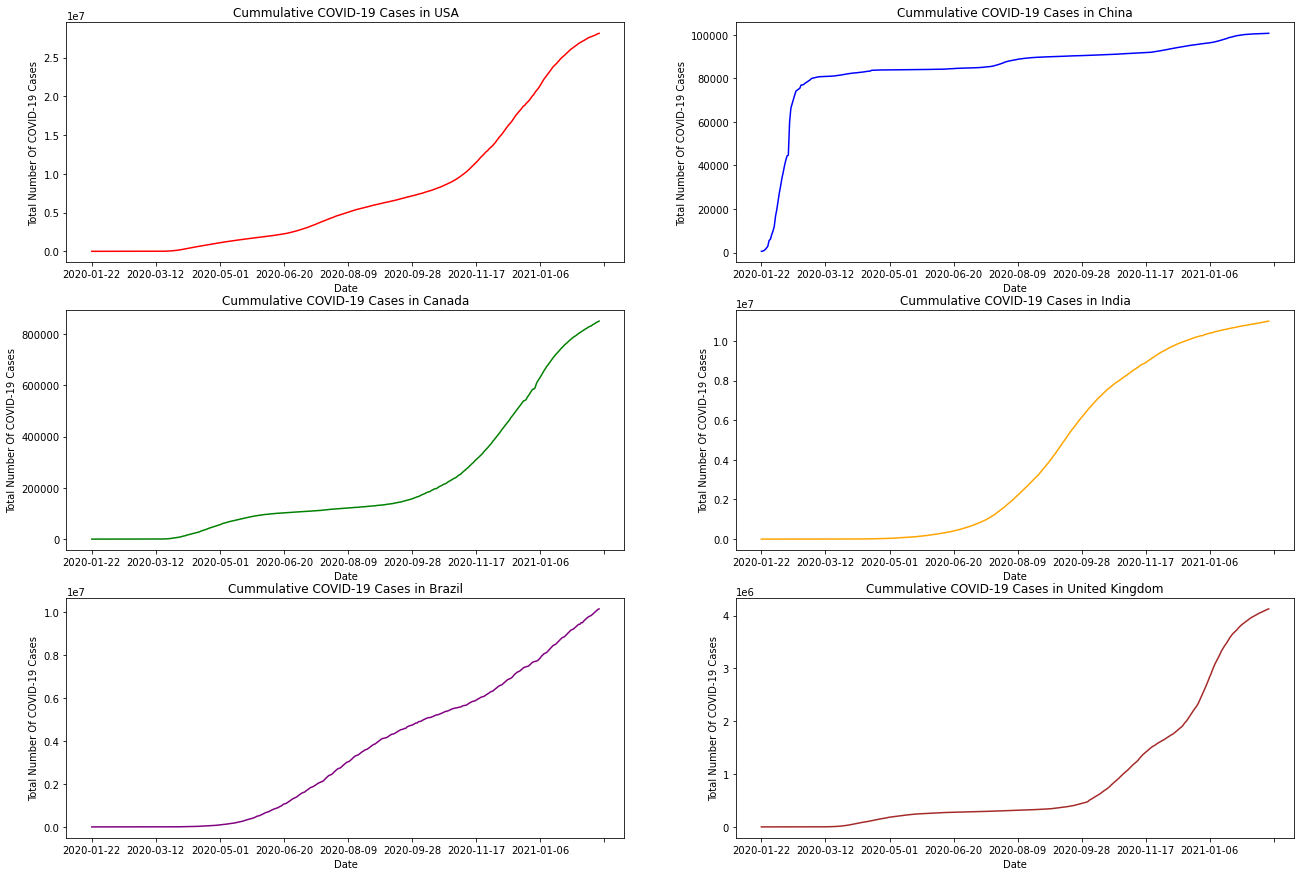

In [4]:
#Plotting graph
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(22,15))

plt.subplot(3,2,1)
ax=df.loc['US'].plot(kind='line',color='red', title='Cummulative COVID-19 Cases in USA')
ax.set_xlabel("Date")
ax.set_ylabel("Total Number Of COVID-19 Cases")

plt.subplot(3, 2, 2)
bx=df.loc['China'].plot(kind='line',color='blue', title='Cummulative COVID-19 Cases in China')
bx.set_xlabel("Date")
bx.set_ylabel("Total Number Of COVID-19 Cases")

plt.subplot(3,2,3)
cx=df.loc['Canada'].plot(kind='line',color='green', title='Cummulative COVID-19 Cases in Canada')
cx.set_xlabel("Date")
cx.set_ylabel("Total Number Of COVID-19 Cases")

plt.subplot(3, 2, 4)
dx=df.loc['India'].plot(kind='line',color='orange', title='Cummulative COVID-19 Cases in India')
dx.set_xlabel("Date")
dx.set_ylabel("Total Number Of COVID-19 Cases")

plt.subplot(3,2,5)
ex=df.loc['Brazil'].plot(kind='line',color='purple', title='Cummulative COVID-19 Cases in Brazil')
ex.set_xlabel("Date")
ex.set_ylabel("Total Number Of COVID-19 Cases")

plt.subplot(3, 2, 6)
fx=df.loc['United Kingdom'].plot(kind='line', color='brown',title='Cummulative COVID-19 Cases in United Kingdom')
fx.set_xlabel("Date")
fx.set_ylabel("Total Number Of COVID-19 Cases")

plt.show()

In [5]:
#Standardization of the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df)
X_std = scaler.transform(df)

In [6]:
X_std

array([[-0.44329426, -0.44387359, -0.44254398, ...,  2.00884532,
         2.00855945,  2.00856953],
       [-0.44819254, -0.44804795, -0.44837973, ..., -0.86492779,
        -0.86514609, -0.86515509],
       [ 2.2360644 ,  2.23606538,  2.2360629 , ..., -0.94375086,
        -0.94404608, -0.94415066],
       [-0.44819254, -0.44804795, -0.44837973, ...,  0.20708174,
         0.20535255,  0.20448678],
       [-0.44819254, -0.44804795, -0.44837973, ...,  0.11257686,
         0.11538169,  0.11625405],
       [-0.44819254, -0.44804795, -0.44837973, ..., -0.51982526,
        -0.52010151, -0.52000462]])

In [7]:
X_std.mean()

6.059151687710762e-19

In [8]:
X_std.var()

1.0

In [9]:
date = list(df.columns)
date

['2020-01-22',
 '2020-01-23',
 '2020-01-24',
 '2020-01-25',
 '2020-01-26',
 '2020-01-27',
 '2020-01-28',
 '2020-01-29',
 '2020-01-30',
 '2020-01-31',
 '2020-02-01',
 '2020-02-02',
 '2020-02-03',
 '2020-02-04',
 '2020-02-05',
 '2020-02-06',
 '2020-02-07',
 '2020-02-08',
 '2020-02-09',
 '2020-02-10',
 '2020-02-11',
 '2020-02-12',
 '2020-02-13',
 '2020-02-14',
 '2020-02-15',
 '2020-02-16',
 '2020-02-17',
 '2020-02-18',
 '2020-02-19',
 '2020-02-20',
 '2020-02-21',
 '2020-02-22',
 '2020-02-23',
 '2020-02-24',
 '2020-02-25',
 '2020-02-26',
 '2020-02-27',
 '2020-02-28',
 '2020-02-29',
 '2020-03-01',
 '2020-03-02',
 '2020-03-03',
 '2020-03-04',
 '2020-03-05',
 '2020-03-06',
 '2020-03-07',
 '2020-03-08',
 '2020-03-09',
 '2020-03-10',
 '2020-03-11',
 '2020-03-12',
 '2020-03-13',
 '2020-03-14',
 '2020-03-15',
 '2020-03-16',
 '2020-03-17',
 '2020-03-18',
 '2020-03-19',
 '2020-03-20',
 '2020-03-21',
 '2020-03-22',
 '2020-03-23',
 '2020-03-24',
 '2020-03-25',
 '2020-03-26',
 '2020-03-27',
 '2020-03-

In [10]:
#Framing the standarized dataset
df1 = pd.DataFrame((X_std), columns=date)
df1

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21
0,-0.443294,-0.443874,-0.442544,-0.444159,-0.442296,-0.443667,-0.445460,-0.445273,-0.445829,-0.445844,...,2.008709,2.009006,2.009332,2.009365,2.009016,2.008706,2.008491,2.008845,2.008559,2.008570
1,-0.448193,-0.448048,-0.448380,-0.447977,-0.447471,-0.447400,-0.446921,-0.447037,-0.447148,-0.446940,...,-0.864769,-0.864581,-0.864416,-0.864483,-0.864683,-0.865006,-0.865177,-0.864928,-0.865146,-0.865155
2,2.236064,2.236065,2.236063,2.236066,2.236062,2.236065,2.236067,2.236067,2.236067,2.236067,...,-0.942786,-0.942764,-0.942655,-0.942758,-0.943234,-0.943632,-0.943973,-0.943751,-0.944046,-0.944151
3,-0.448193,-0.448048,-0.448380,-0.447977,-0.448765,-0.448333,-0.447896,-0.447919,-0.447477,-0.447761,...,0.220087,0.217845,0.216549,0.215206,0.213403,0.211496,0.209726,0.207082,0.205353,0.204487
4,-0.448193,-0.448048,-0.448380,-0.447977,-0.448765,-0.448333,-0.447896,-0.447919,-0.447807,-0.448035,...,0.098620,0.100199,0.100577,0.101924,0.105032,0.108067,0.110660,0.112577,0.115382,0.116254
5,-0.448193,-0.448048,-0.448380,-0.447977,-0.448765,-0.448333,-0.447896,-0.447919,-0.447807,-0.447487,...,-0.519860,-0.519705,-0.519387,-0.519255,-0.519535,-0.519631,-0.519727,-0.519825,-0.520102,-0.520005


In [11]:
df1.index=['US','Canada','China','India','Brazil','United Kingdom']
df1

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21
US,-0.443294,-0.443874,-0.442544,-0.444159,-0.442296,-0.443667,-0.445460,-0.445273,-0.445829,-0.445844,...,2.008709,2.009006,2.009332,2.009365,2.009016,2.008706,2.008491,2.008845,2.008559,2.008570
Canada,-0.448193,-0.448048,-0.448380,-0.447977,-0.447471,-0.447400,-0.446921,-0.447037,-0.447148,-0.446940,...,-0.864769,-0.864581,-0.864416,-0.864483,-0.864683,-0.865006,-0.865177,-0.864928,-0.865146,-0.865155
China,2.236064,2.236065,2.236063,2.236066,2.236062,2.236065,2.236067,2.236067,2.236067,2.236067,...,-0.942786,-0.942764,-0.942655,-0.942758,-0.943234,-0.943632,-0.943973,-0.943751,-0.944046,-0.944151
India,-0.448193,-0.448048,-0.448380,-0.447977,-0.448765,-0.448333,-0.447896,-0.447919,-0.447477,-0.447761,...,0.220087,0.217845,0.216549,0.215206,0.213403,0.211496,0.209726,0.207082,0.205353,0.204487
Brazil,-0.448193,-0.448048,-0.448380,-0.447977,-0.448765,-0.448333,-0.447896,-0.447919,-0.447807,-0.448035,...,0.098620,0.100199,0.100577,0.101924,0.105032,0.108067,0.110660,0.112577,0.115382,0.116254
United Kingdom,-0.448193,-0.448048,-0.448380,-0.447977,-0.448765,-0.448333,-0.447896,-0.447919,-0.447807,-0.447487,...,-0.519860,-0.519705,-0.519387,-0.519255,-0.519535,-0.519631,-0.519727,-0.519825,-0.520102,-0.520005


In [12]:
df1.describe()

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21
count,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000,6.000000e+00,6.000000,6.000000e+00,6.000000e+00,6.000000e+00
mean,-1.850372e-17,-3.700743e-17,9.251859e-17,-3.700743e-17,7.401487e-17,-1.850372e-17,-1.850372e-17,5.551115e-17,-1.850372e-17,0.000000,...,5.551115e-17,9.251859e-17,-1.295260e-16,1.295260e-16,0.000000,-1.850372e-17,0.000000,9.251859e-17,9.251859e-17,-5.551115e-17
std,1.095445e+00,1.095445e+00,1.095445e+00,1.095445e+00,1.095445e+00,1.095445e+00,1.095445e+00,1.095445e+00,1.095445e+00,1.095445,...,1.095445e+00,1.095445e+00,1.095445e+00,1.095445e+00,1.095445,1.095445e+00,1.095445,1.095445e+00,1.095445e+00,1.095445e+00
min,-4.481925e-01,-4.480479e-01,-4.483797e-01,-4.479768e-01,-4.487651e-01,-4.483327e-01,-4.478955e-01,-4.479189e-01,-4.478069e-01,-0.448035,...,-9.427862e-01,-9.427643e-01,-9.426551e-01,-9.427583e-01,-0.943234,-9.436317e-01,-0.943973,-9.437509e-01,-9.440461e-01,-9.441507e-01
25%,-4.481925e-01,-4.480479e-01,-4.483797e-01,-4.479768e-01,-4.487651e-01,-4.483327e-01,-4.478955e-01,-4.479189e-01,-4.477245e-01,-0.447693,...,-7.785415e-01,-7.783617e-01,-7.781586e-01,-7.781756e-01,-0.778396,-7.786624e-01,-0.778815,-7.786522e-01,-7.788849e-01,-7.788675e-01
50%,-4.481925e-01,-4.480479e-01,-4.483797e-01,-4.479768e-01,-4.481181e-01,-4.478661e-01,-4.474083e-01,-4.474780e-01,-4.473124e-01,-0.447213,...,-2.106204e-01,-2.097530e-01,-2.094047e-01,-2.086652e-01,-0.207251,-2.057818e-01,-0.204534,-2.036242e-01,-2.023599e-01,-2.018753e-01
75%,-4.445188e-01,-4.449172e-01,-4.440029e-01,-4.451133e-01,-4.435895e-01,-4.446004e-01,-4.458249e-01,-4.457142e-01,-4.461585e-01,-0.446118,...,1.897200e-01,1.884332e-01,1.875558e-01,1.868855e-01,0.186310,1.856388e-01,0.184960,1.834555e-01,1.828598e-01,1.824286e-01
max,2.236064e+00,2.236065e+00,2.236063e+00,2.236066e+00,2.236062e+00,2.236065e+00,2.236067e+00,2.236067e+00,2.236067e+00,2.236067,...,2.008709e+00,2.009006e+00,2.009332e+00,2.009365e+00,2.009016,2.008706e+00,2.008491,2.008845e+00,2.008559e+00,2.008570e+00


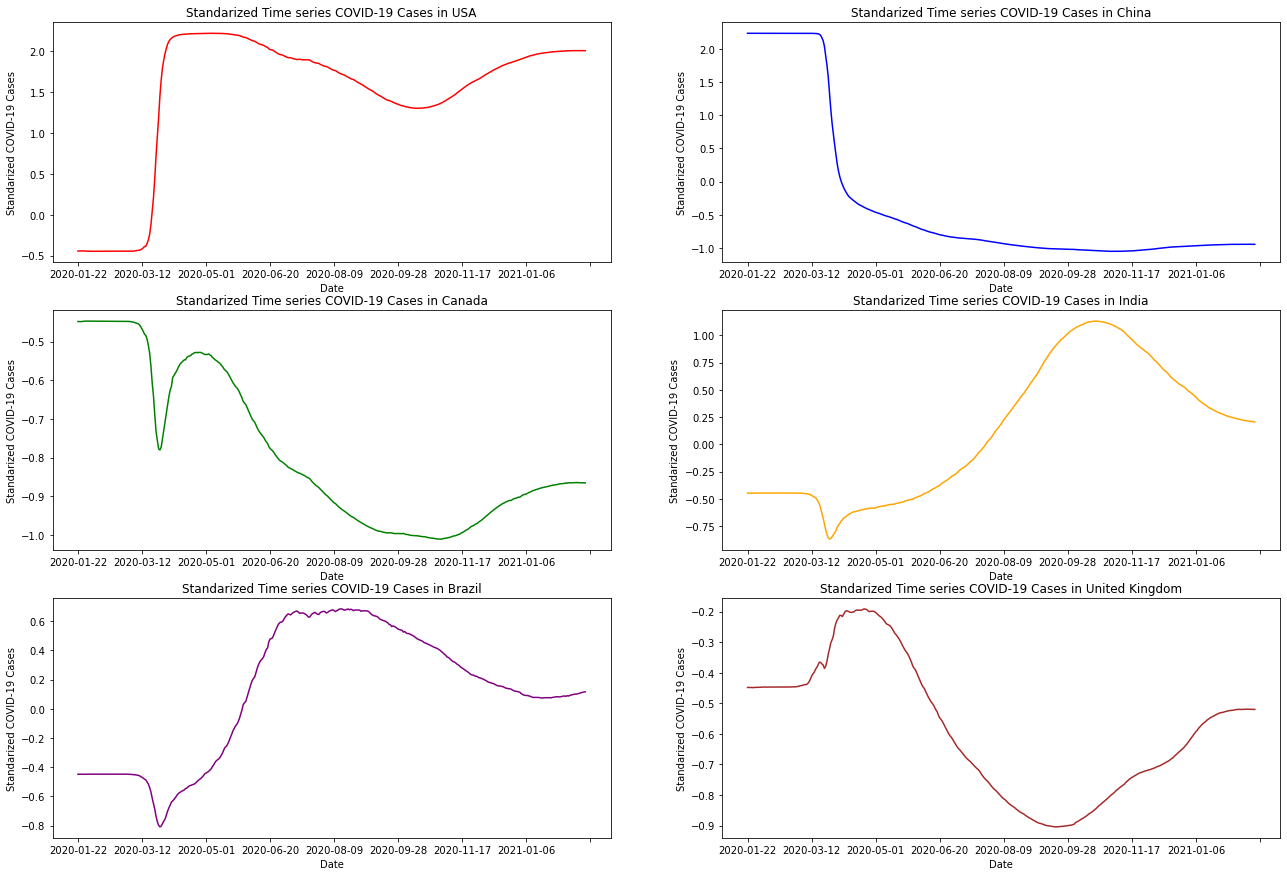

In [13]:
#Plotting graph for the standarized dataframe
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(22,15))

plt.subplot(3,2,1)
ax1=df1.loc['US'].plot(kind='line',color='red', title='Standarized Time series COVID-19 Cases in USA')
ax1.set_xlabel("Date")
ax1.set_ylabel("Standarized COVID-19 Cases")

plt.subplot(3, 2, 2)
bx1=df1.loc['China'].plot(kind='line',color='blue', title='Standarized Time series COVID-19 Cases in China')
bx1.set_xlabel("Date")
bx1.set_ylabel("Standarized COVID-19 Cases")

plt.subplot(3,2,3)
cx1=df1.loc['Canada'].plot(kind='line',color='green', title='Standarized Time series COVID-19 Cases in Canada')
cx1.set_xlabel("Date")
cx1.set_ylabel("Standarized COVID-19 Cases")

plt.subplot(3, 2, 4)
dx1=df1.loc['India'].plot(kind='line',color='orange', title='Standarized Time series COVID-19 Cases in India')
dx1.set_xlabel("Date")
dx1.set_ylabel("Standarized COVID-19 Cases")

plt.subplot(3,2,5)
ex1=df1.loc['Brazil'].plot(kind='line',color='purple', title='Standarized Time series COVID-19 Cases in Brazil')
ex1.set_xlabel("Date")
ex1.set_ylabel("Standarized COVID-19 Cases")

plt.subplot(3, 2, 6)
fx1=df1.loc['United Kingdom'].plot(kind='line', color='brown',title='Standarized Time series COVID-19 Cases in United Kingdom')
fx1.set_xlabel("Date")
fx1.set_ylabel("Standarized COVID-19 Cases")

plt.show()

Text(0, 0.5, 'Standarized COVID-19 Cases')

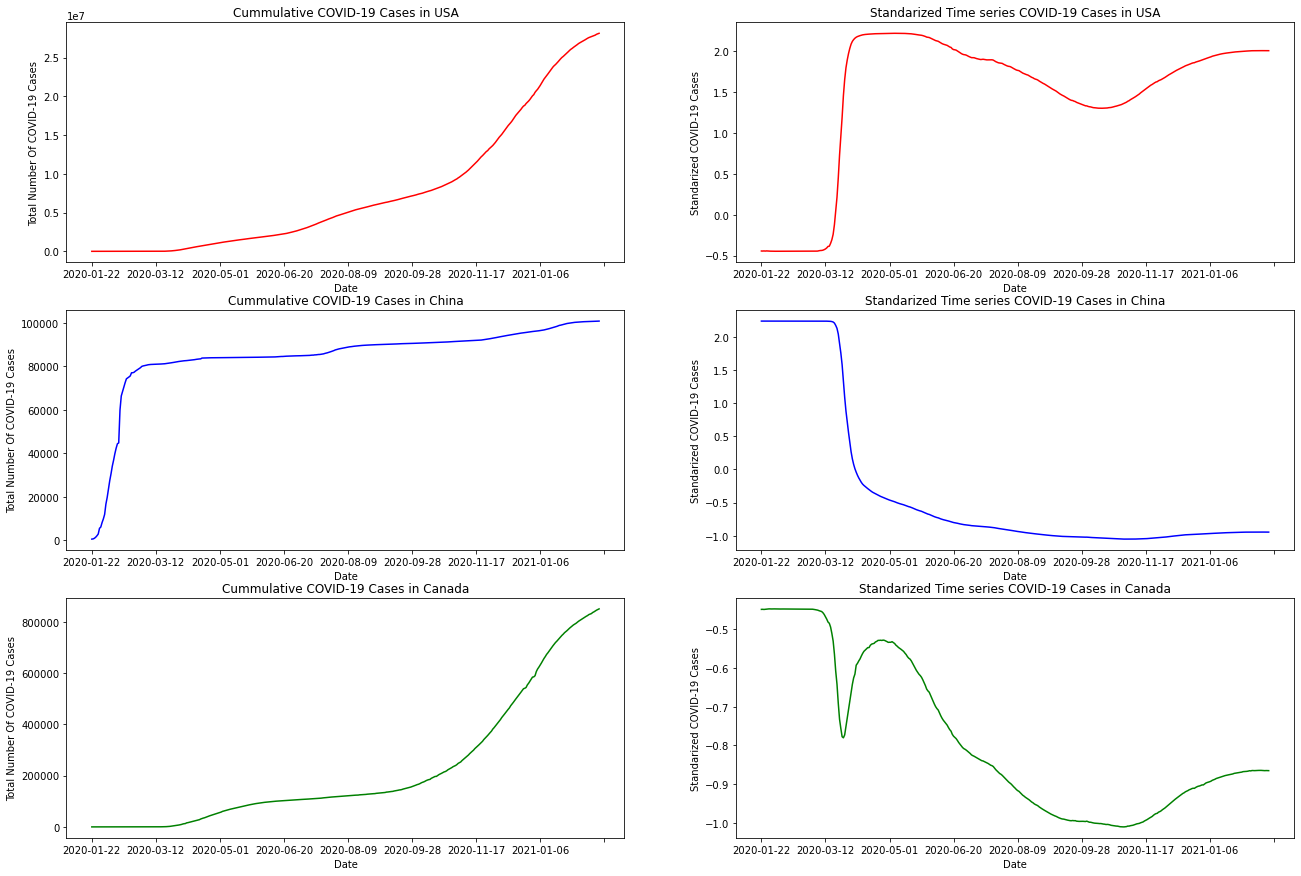

In [14]:
#Comparision Graph 
fig = plt.figure(figsize=(22,15))

plt.subplot(3,2,1)
ax2=df.loc['US'].plot(kind='line',color='red', title='Cummulative COVID-19 Cases in USA')
ax2.set_xlabel("Date")
ax2.set_ylabel("Total Number Of COVID-19 Cases")

plt.subplot(3,2,2)
ax3=df1.loc['US'].plot(kind='line',color='red', title='Standarized Time series COVID-19 Cases in USA')
ax3.set_xlabel("Date")
ax3.set_ylabel("Standarized COVID-19 Cases")

plt.subplot(3, 2, 3)
bx2=df.loc['China'].plot(kind='line',color='blue', title='Cummulative COVID-19 Cases in China')
bx2.set_xlabel("Date")
bx2.set_ylabel("Total Number Of COVID-19 Cases")

plt.subplot(3, 2, 4)
bx3=df1.loc['China'].plot(kind='line',color='blue', title='Standarized Time series COVID-19 Cases in China')
bx3.set_xlabel("Date")
bx3.set_ylabel("Standarized COVID-19 Cases")


plt.subplot(3,2,5)
cx2=df.loc['Canada'].plot(kind='line',color='green', title='Cummulative COVID-19 Cases in Canada')
cx2.set_xlabel("Date")
cx2.set_ylabel("Total Number Of COVID-19 Cases")


plt.subplot(3,2,6)
cx3=df1.loc['Canada'].plot(kind='line',color='green', title='Standarized Time series COVID-19 Cases in Canada')
cx3.set_xlabel("Date")
cx3.set_ylabel("Standarized COVID-19 Cases")

1. In US, the first COVID infection rate got declined by the October,2020. While in China, the infection rate is quite in control since March,2020. Looking at Canada, there are multiple waves fo infectionbetween March,2020 to September and other one October,2020 onward.
2. The up and down curves in the standarized plot shows the COVID infection waves. If the curve goes up then there is subsequent infection wave or the infection rate has been increasing. Also, if the curve goes down then the infection rate is decreasing.
3. The negative values shows that the actual infection value on that date is lower than the mean value while the positive value shows the the infection value on that particular time is greater than the mean infection value.

# Part 2: Applying PCA [2 Marks]

1. Compute the covariance matrix of the dataframe. *Hint: The dimensions of your covariance matrix should be (397, 397).* **[0.25]**
2. Compute eigenvalues and eigenvectors using `np.linalg.eigh`. **[0.25]**
3. Show the effectiveness of your principal components in covering the variance of the dataset with a `scree plot`(zoom-in on the x-axis if needed). **[0.25]**
4. How many PCs do you need to cover 99\% of the dataset's variance? **[0.25]**
5. Plot the first 16 principal components (Eigenvectors) as a time series (16 subplots, on the x-axis you have dates and on the y-axis you have the value of the PC element) . **[0.5]**
6. Compare the first few PCs with the rest of them. Do you see any difference in their trend? **[0.5]**

In [15]:
# Standarizing the whole dataset
X_std_raw = StandardScaler().fit_transform(cases_raw)
X_std_raw

array([[-0.07354936, -0.07371259, -0.07401528, ..., -0.22217351,
        -0.22234954, -0.22253575],
       [-0.07354936, -0.07371259, -0.07401528, ..., -0.20412482,
        -0.20386101, -0.20359225],
       [-0.07354936, -0.07371259, -0.07401528, ..., -0.1982878 ,
        -0.19846012, -0.19863975],
       ...,
       [-0.07354936, -0.07371259, -0.07401528, ..., -0.24494775,
        -0.24506498, -0.24521219],
       [-0.07354936, -0.07371259, -0.07401528, ..., -0.21465798,
        -0.21456244, -0.2145161 ],
       [-0.07354936, -0.07371259, -0.07401528, ..., -0.23064276,
        -0.2307736 , -0.23094113]])

In [16]:
import numpy as np
n, m = X_std_raw.shape

# Compute covariance matrix
C = np.dot(X_std_raw.T, X_std_raw) / (n-1) 
C

array([[ 1.0052356 ,  1.00522866,  1.00522154, ..., -0.0134116 ,
        -0.01342794, -0.01344424],
       [ 1.00522866,  1.0052356 ,  1.00522873, ..., -0.01369157,
        -0.0137079 , -0.01372424],
       [ 1.00522154,  1.00522873,  1.0052356 , ..., -0.01299455,
        -0.01301158, -0.01302844],
       ...,
       [-0.0134116 , -0.01369157, -0.01299455, ...,  1.0052356 ,
         1.00523493,  1.00523398],
       [-0.01342794, -0.0137079 , -0.01301158, ...,  1.00523493,
         1.0052356 ,  1.00523533],
       [-0.01344424, -0.01372424, -0.01302844, ...,  1.00523398,
         1.00523533,  1.0052356 ]])

In [17]:
C.shape

(397, 397)

In [18]:
# Eigen decomposition
eigenValues, eigenVectors = np.linalg.eigh(C) 
print ("Eig Vec:\n ",eigenVectors, " \n Eig Val: \n", eigenValues)

Eig Vec:
  [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  3.87247871e-02
  -1.23523262e-01  1.56868914e-03]
 [ 3.77491359e-02  6.96173354e-03  7.63877197e-03 ...  3.87443647e-02
  -1.23521844e-01  1.55365943e-03]
 [-2.49767445e-02 -2.85863405e-02  1.97165461e-02 ...  3.86452715e-02
  -1.23533541e-01  1.59199653e-03]
 ...
 [-7.39906259e-04 -6.60021989e-03 -3.57030804e-03 ... -8.46865928e-03
   4.67073768e-03  5.71126219e-02]
 [-7.70616966e-03  4.62731665e-05 -9.40394882e-03 ... -8.44843917e-03
   4.67458693e-03  5.71142140e-02]
 [ 4.72656300e-03  2.11995663e-02  1.87315202e-02 ... -8.46255876e-03
   4.67416896e-03  5.71147879e-02]]  
 Eig Val: 
 [-5.56402983e-14 -5.00959286e-14 -4.97865008e-14 -4.22347106e-14
 -3.90241302e-14 -2.94037607e-14 -2.82139366e-14 -2.15001826e-14
 -2.08073017e-14 -1.71068457e-14 -1.64391774e-14 -1.09620010e-14
 -8.67708836e-15 -6.39723145e-15 -6.14654094e-15 -5.95525534e-15
 -5.68014046e-15 -5.59393706e-15 -5.42822711e-15 -5.32125712e-15
 -5.18268705e-

In [19]:
#Explained variance
eigValSum = sum(eigenValues)
expVar = [eigV/eigValSum*100 for eigV in eigenValues]
cumExpVar = np.cumsum(expVar)
#print(cumExpVar)

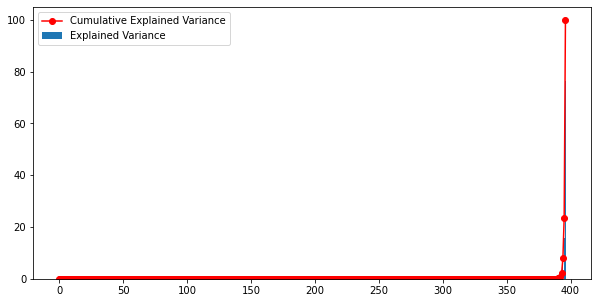

In [20]:
#Plotting the scree graph  
plt.figure(figsize=(10,5))
plt.bar(range(397), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.legend()
plt.show()

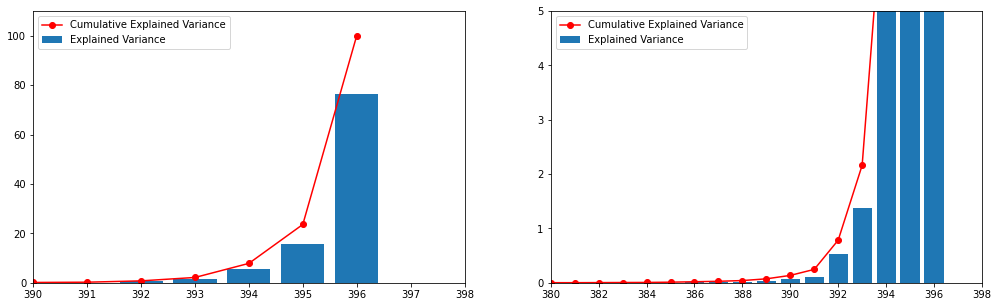

In [21]:
#Zooming onto the x axis

plt.figure(figsize=(17,5))

plt.subplot(1, 2, 1)
plt.bar(range(397), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.axis([390, 398, 0, 110]) 
plt.legend()
#plt.show()

#Zooming onto the y axis
plt.subplot(1, 2, 2)
plt.bar(range(397), expVar, label='Explained Variance')
plt.plot(cumExpVar, 'r-o', label='Cumulative Explained Variance')
plt.axis([380, 398, 0, 5]) 
plt.legend()
plt.show()

4 PCA are needed to cover 99% of the dataset's variance

In [22]:
#Or the other method to obtain the important features
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.99)
X_pca = pca.fit_transform(X_std_raw) # this will fit and reduce dimensions
print(pca.n_components_) # one can print and see how many components are selected. 

4


In [23]:
pd.DataFrame(pca.components_, columns = cases_raw.columns)

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21
0,0.001569,0.001554,0.001592,0.001559,0.001602,0.001571,0.001535,0.001539,0.001529,0.001535,...,0.057106,0.057106,0.057106,0.057108,0.057110,0.057111,0.057112,0.057113,0.057114,0.057115
1,0.123523,0.123522,0.123534,0.123530,0.123530,0.123530,0.123527,0.123527,0.123522,0.123529,...,-0.004692,-0.004689,-0.004684,-0.004677,-0.004679,-0.004678,-0.004676,-0.004671,-0.004675,-0.004674
2,0.038725,0.038744,0.038645,0.038708,0.038642,0.038691,0.038751,0.038745,0.038795,0.038766,...,-0.008177,-0.008240,-0.008301,-0.008364,-0.008358,-0.008367,-0.008392,-0.008469,-0.008448,-0.008463
3,-0.032182,-0.032197,-0.032045,-0.031981,-0.032115,-0.032075,-0.032020,-0.032027,-0.032014,-0.032006,...,0.009143,0.008926,0.008811,0.008748,0.008569,0.008420,0.008309,0.008035,0.007790,0.007679


In [24]:
n_pcs= pca.n_components_ # get number of component
# get the index of the most important feature on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = cases_raw.columns
# get the most important feature names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
most_important_names

['2021-02-21', '2020-03-10', '2020-04-03', '2020-03-25']

In [25]:
eigenVectors

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         3.87247871e-02, -1.23523262e-01,  1.56868914e-03],
       [ 3.77491359e-02,  6.96173354e-03,  7.63877197e-03, ...,
         3.87443647e-02, -1.23521844e-01,  1.55365943e-03],
       [-2.49767445e-02, -2.85863405e-02,  1.97165461e-02, ...,
         3.86452715e-02, -1.23533541e-01,  1.59199653e-03],
       ...,
       [-7.39906259e-04, -6.60021989e-03, -3.57030804e-03, ...,
        -8.46865928e-03,  4.67073768e-03,  5.71126219e-02],
       [-7.70616966e-03,  4.62731665e-05, -9.40394882e-03, ...,
        -8.44843917e-03,  4.67458693e-03,  5.71142140e-02],
       [ 4.72656300e-03,  2.11995663e-02,  1.87315202e-02, ...,
        -8.46255876e-03,  4.67416896e-03,  5.71147879e-02]])

In [26]:
df_eigen = pd.DataFrame((eigenVectors), columns=date)
df_eigen

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.036801,0.018007,-0.052654,-0.018646,0.027067,0.047598,-0.032182,0.038725,-0.123523,0.001569
1,0.037749,0.006962,0.007639,0.009538,-0.000130,-0.026020,-0.014086,0.008114,-0.002215,-0.015461,...,-0.038288,0.018151,-0.052819,-0.019084,0.027071,0.047566,-0.032197,0.038744,-0.123522,0.001554
2,-0.024977,-0.028586,0.019717,-0.007152,-0.026659,0.021895,-0.013239,-0.053517,-0.017052,0.034185,...,-0.039465,0.010127,-0.053234,-0.019860,0.026208,0.047729,-0.032045,0.038645,-0.123534,0.001592
3,-0.021876,0.012804,-0.017559,-0.005138,0.022020,0.003648,0.077328,0.075386,0.019603,-0.036468,...,-0.040234,0.011242,-0.055069,-0.019825,0.026060,0.047655,-0.031981,0.038708,-0.123530,0.001559
4,-0.009637,-0.023324,0.019568,0.019468,0.009266,0.005069,-0.052239,-0.053116,0.016161,0.015334,...,-0.039970,0.013480,-0.053976,-0.019584,0.026675,0.047787,-0.032115,0.038642,-0.123530,0.001602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0.008352,0.016526,0.019126,0.001004,-0.003138,-0.016180,-0.008991,0.007919,-0.014896,0.018764,...,0.068374,0.009861,-0.043825,0.081224,-0.023036,0.048136,0.008420,-0.008367,0.004678,0.057111
393,0.001429,-0.019787,-0.016151,-0.013842,-0.009074,-0.023832,-0.024636,-0.016376,0.019267,0.015952,...,0.069362,0.008604,-0.045364,0.081589,-0.023411,0.047697,0.008309,-0.008392,0.004676,0.057112
394,-0.000740,-0.006600,-0.003570,0.000706,-0.002132,-0.003968,-0.001178,-0.012209,-0.003595,0.004759,...,0.070291,0.009455,-0.045781,0.082313,-0.023304,0.047370,0.008035,-0.008469,0.004671,0.057113
395,-0.007706,0.000046,-0.009404,0.000927,0.011316,0.007261,0.019205,0.005035,0.052060,-0.035369,...,0.070788,0.010029,-0.046347,0.083219,-0.023621,0.046937,0.007790,-0.008448,0.004675,0.057114


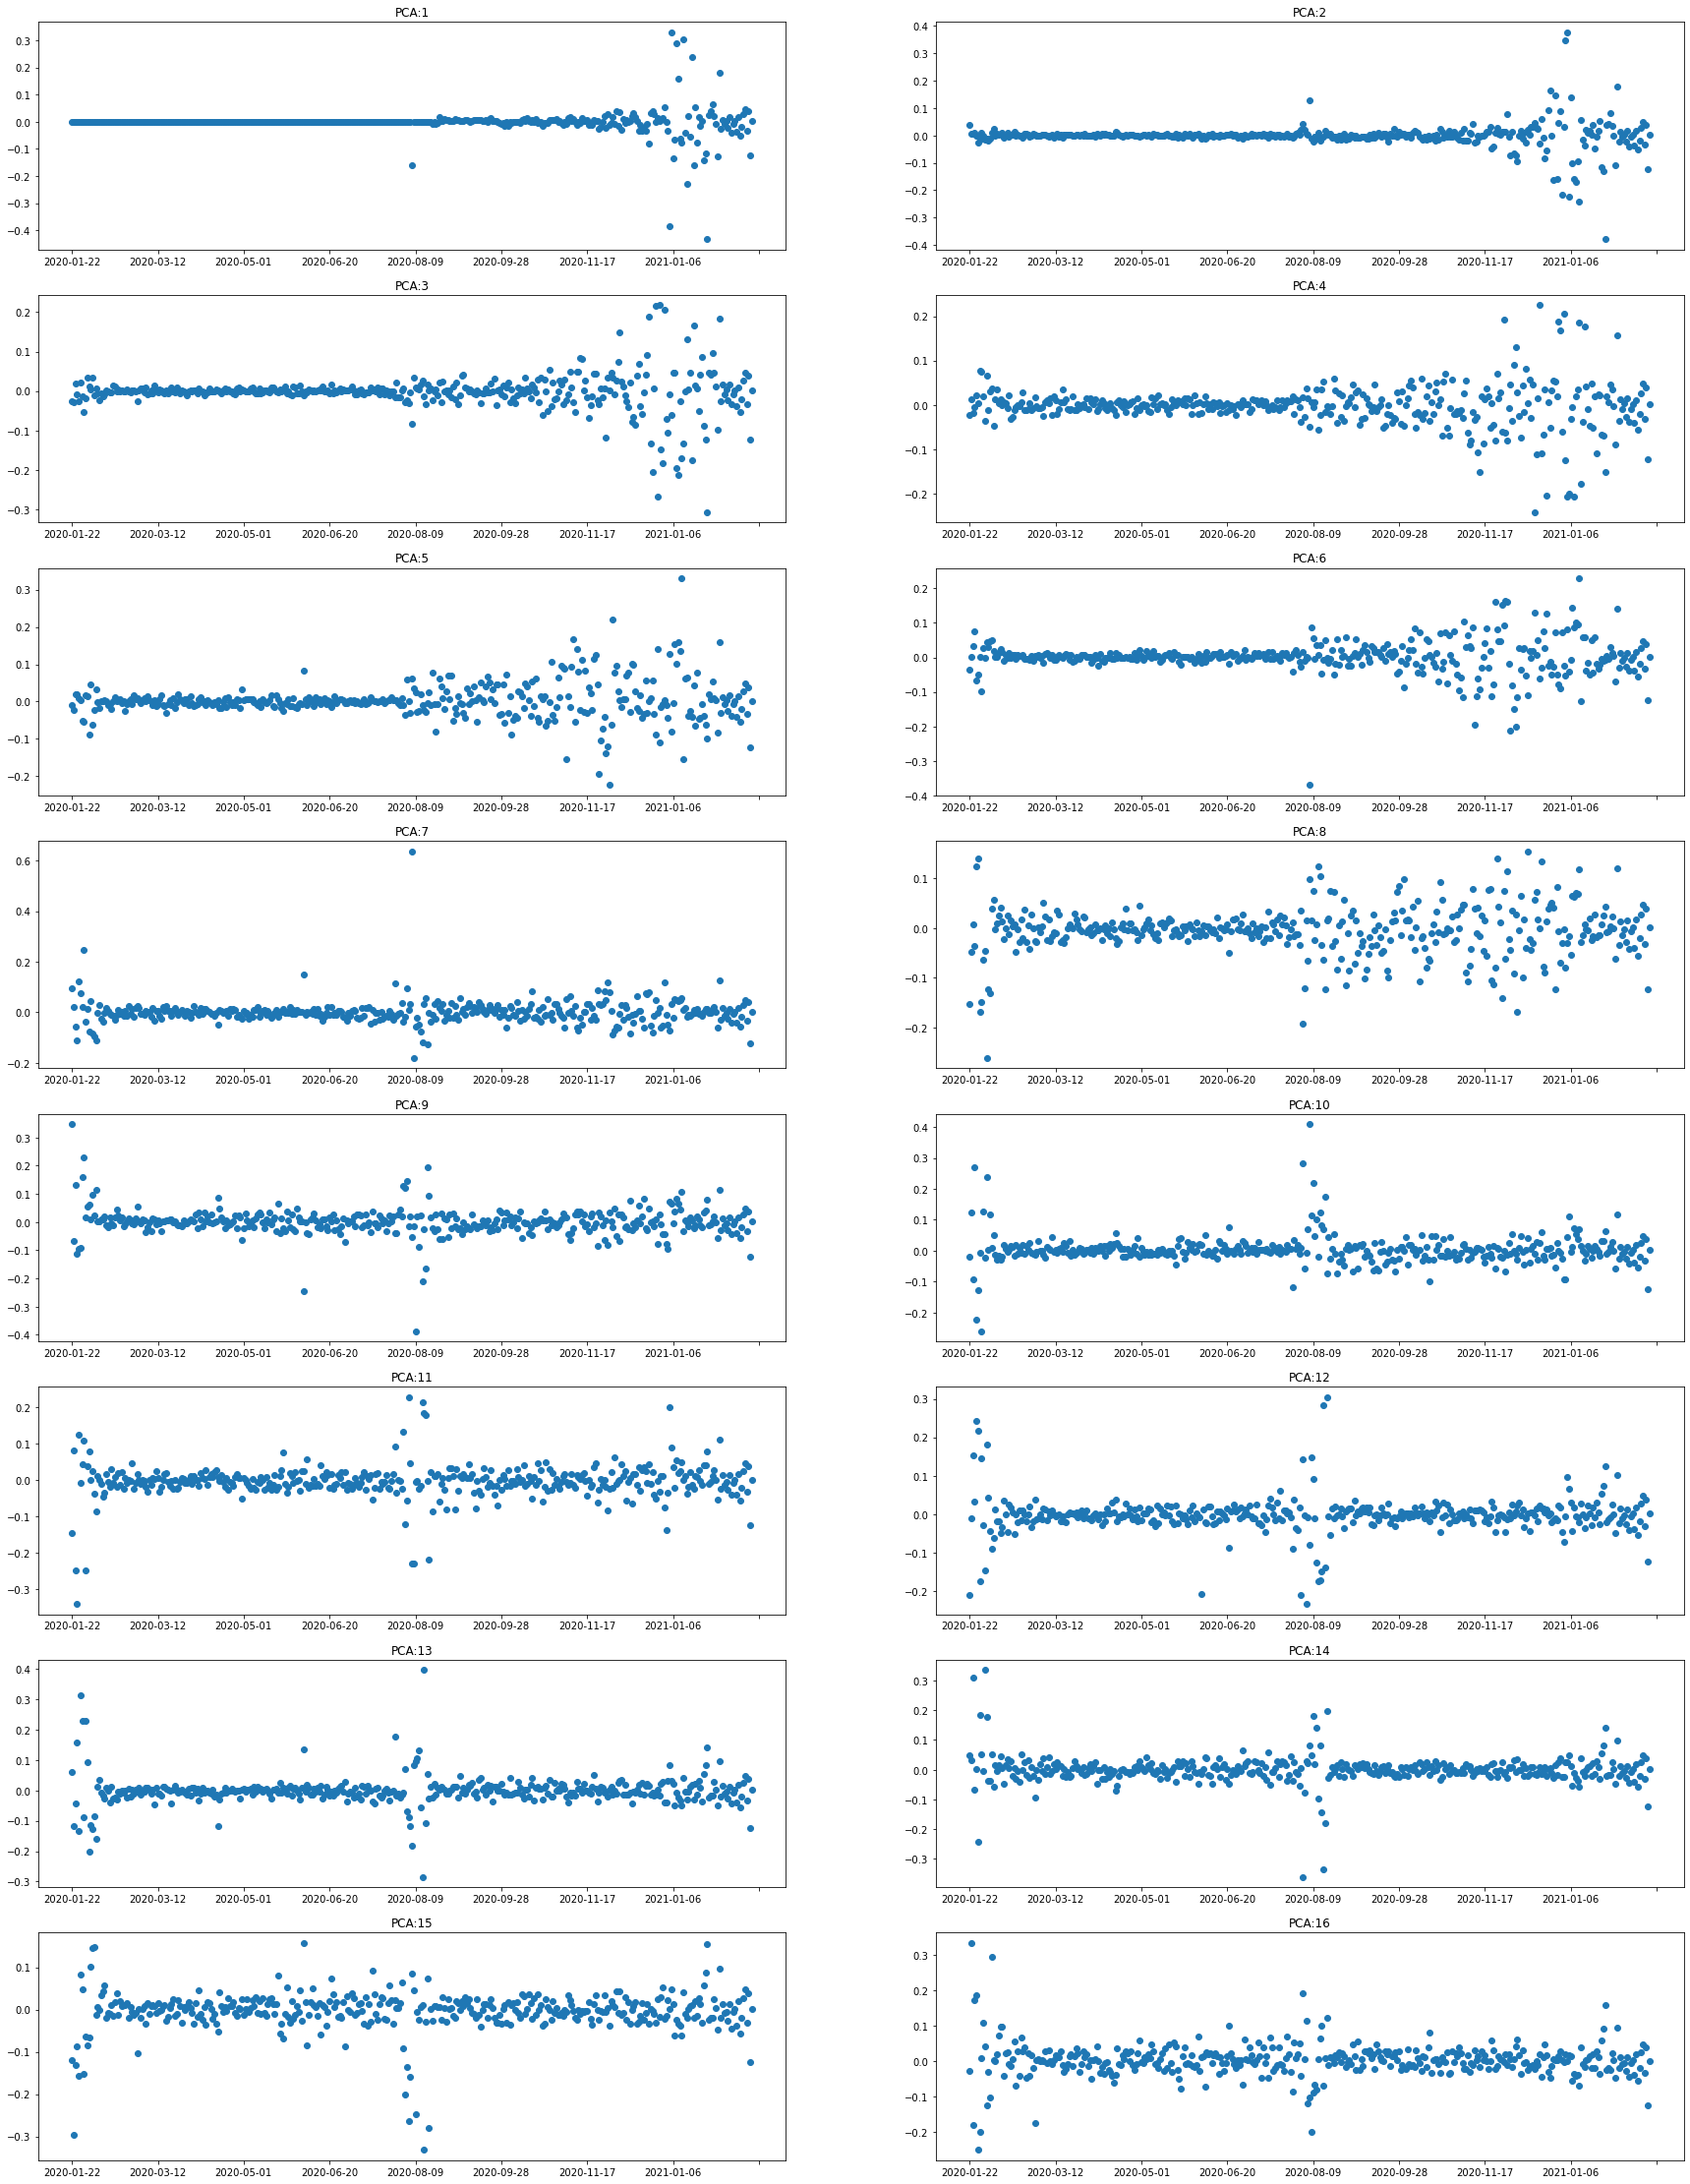

In [27]:
#Plotting the first 16 subplots

fig, axes = plt.subplots(8, 2, figsize=(30,40),sharex=False,sharey=False)

axes[0,0].plot(df_eigen.iloc[0:1].transpose(),'o')
axes[0,0].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[0,0].set_title("PCA:1")
axes[0,1].plot(df_eigen.iloc[1:2].transpose(),'o')
axes[0,1].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[0,1].set_title("PCA:2")

axes[1,0].plot(df_eigen.iloc[2:3].transpose(),'o')
axes[1,0].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[1,0].set_title("PCA:3")
axes[1,1].plot(df_eigen.iloc[3:4].transpose(),'o')
axes[1,1].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[1,1].set_title("PCA:4")

axes[2,0].plot(df_eigen.iloc[4:5].transpose(),'o')
axes[2,0].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[2,0].set_title("PCA:5")
axes[2,1].plot(df_eigen.iloc[5:6].transpose(),'o')
axes[2,1].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[2,1].set_title("PCA:6")

axes[3,0].plot(df_eigen.iloc[6:7].transpose(),'o')
axes[3,0].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[3,0].set_title("PCA:7")
axes[3,1].plot(df_eigen.iloc[7:8].transpose(),'o')
axes[3,1].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[3,1].set_title("PCA:8")

axes[4,0].plot(df_eigen.iloc[8:9].transpose(),'o')
axes[4,0].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[4,0].set_title("PCA:9")
axes[4,1].plot(df_eigen.iloc[9:10].transpose(),'o')
axes[4,1].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[4,1].set_title("PCA:10")

axes[5,0].plot(df_eigen.iloc[10:11].transpose(),'o')
axes[5,0].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[5,0].set_title("PCA:11")
axes[5,1].plot(df_eigen.iloc[11:12].transpose(),'o')
axes[5,1].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[5,1].set_title("PCA:12")

axes[6,0].plot(df_eigen.iloc[12:13].transpose(),'o')
axes[6,0].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[6,0].set_title("PCA:13")
axes[6,1].plot(df_eigen.iloc[13:14].transpose(),'o')
axes[6,1].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[6,1].set_title("PCA:14")

axes[7,0].plot(df_eigen.iloc[14:15].transpose(),'o')
axes[7,0].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[7,0].set_title("PCA:15")
axes[7,1].plot(df_eigen.iloc[15:16].transpose(),'o')
axes[7,1].xaxis.set_major_locator(plt.MaxNLocator(10))
axes[7,1].set_title("PCA:16")

plt.show()

#### Comparing the subplots, as moving towards the PCA in increasing order, the randomdness across the value 0 is increasing from the initial time. PCA:1 plot and PCA:16 plots have a major difference/flunctuations across the zero value starting with the very early date.

# Part 3: Data reconstruction [4 Marks]

Create a function that:

*   Accepts a country name as an input (add other arguments if needed).
*   Plots 4 figures:
1.   The original and standardized time-series for the specified country. **[0.5]**
2.   The incremental reconstruction of the **original** (not standardized) time-series for the specified country in a single plot. **[1.5]**
  * You should at least show 5 curves in a figure for incremental reconstruction. For example, you can pick the following (or any other combination that you think is reasonable): 
      * Reconstruction with only PC1
      * Reconstruction with both PC1 and PC2
      * Reconstruction with PC1 to PC4 (First 4 PCs)
      * Reconstruction with PC1 to PC8 (First 8 PCs)
      * Reconstruction with PC1 to PC16 (First 16 PCs)

  * Hint: you need to compute the reconstruction for the standardized time-series first, and then scale it back to the original (non-standardized form) using the StandardScaler `inverse_transform` [help...](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.inverse_transform)
3.   The residual error for each of the 5 incremental reconstructions with respect to the original time-series. **[0.5]**
  * Hint: You are plotting how much error do we have for reconstructing each day. On the x-axis, you have dates, and on the y-axis, the residual error. 
4.   The RMSE of the reconstruction as a function of the number of included components (x-axis is the number of components and y-axis is the RMSE). **[1]**

Test your function using the `US`, `Canada`, and `China` as inputs. **[0.5]**


In [28]:
#Preprocessing the data for the inputs
US=df.loc[['US']]
US_std=df1.loc[['US']]

Canada=df.loc[['Canada']]
Canada_std=df1.loc[['Canada']]

China=df.loc[['China']]
China_std=df1.loc[['China']]

df_std=df1

In [29]:
def COVID_country(country,df,country_std,df_std,country_graph):

    
    #plt.figure(figsize=(15,7))
    country.transpose().plot(title='Original COVID-19 Cases in selected country',color='green',figsize=(10,5))
    country_std.transpose().plot(title='Standarized COVID-19 Cases in selected country',color='red',figsize=(10,5))
    plt.show()
     
    df11 = df.values
    X_std11 = StandardScaler().fit_transform(df11)
    C_covid = np.cov(df11.T)
    eigenValues_covid, eigenVectors_covid = np.linalg.eigh(C_covid) 
    
    W_covid1 = eigenVectors_covid[:,0:1] #With PC=1
    projX_covid1 = np.dot(X_std11, W_covid1)
    ReconX_covid1 = np.dot(projX_covid1, W_covid1.T)
    scaler.fit(df11)
    inversed1 = scaler.inverse_transform(ReconX_covid1)
    original1=pd.DataFrame((inversed1),columns=date)

    W_covid2 = eigenVectors_covid[:,0:10] #With PC=10
    projX_covid2 = np.dot(X_std11, W_covid2)
    ReconX_covid2 = np.dot(projX_covid2, W_covid2.T)
    scaler.fit(df11)
    inversed2 = scaler.inverse_transform(ReconX_covid2)
    original2=pd.DataFrame((inversed2),columns=date)

    W_covid3 = eigenVectors_covid[:,0:20] #With PC=20
    projX_covid3 = np.dot(X_std11, W_covid3)
    ReconX_covid3 = np.dot(projX_covid3, W_covid3.T)
    scaler.fit(df11)
    inversed3 = scaler.inverse_transform(ReconX_covid3)
    original3=pd.DataFrame((inversed3),columns=date)

    W_covid4 = eigenVectors_covid[:,0:40] #With PC=40
    projX_covid4 = np.dot(X_std11, W_covid4)
    ReconX_covid4 = np.dot(projX_covid4, W_covid4.T)
    scaler.fit(df11)
    inversed4 = scaler.inverse_transform(ReconX_covid4)
    original4=pd.DataFrame((inversed4),columns=date)

    W_covid5 = eigenVectors_covid[:,0:80] #With PC=80
    projX_covid5 = np.dot(X_std11, W_covid5)
    ReconX_covid5 = np.dot(projX_covid5, W_covid5.T)
    scaler.fit(df11)
    inversed5 = scaler.inverse_transform(ReconX_covid5)
    original5=pd.DataFrame((inversed5),columns=date)

    #country_graph=[]
    if country_graph== 'US':
        graph=0
    elif country_graph == 'Canada':
        graph=1
    else :
        graph=2
    
    print("The incremental PCA reconstruction of the country",country_graph, "from PC=1 to PC=80 in increasing order")
  
    ax = plt.gca()
    original1.loc[graph:graph].transpose().plot(figsize=(15,7),ax=ax)
    original2.loc[graph:graph].transpose().plot(ax=ax)
    original3.loc[graph:graph].transpose().plot(ax=ax)
    original4.loc[graph:graph].transpose().plot(ax=ax)
    original5.loc[graph:graph].transpose().plot(ax=ax)
    plt.show()

    # Residual plots
    residual_error1=df11-inversed1
    original11=pd.DataFrame((residual_error1),columns=date)
    
    residual_error2=df11-inversed2
    original12=pd.DataFrame((residual_error2),columns=date)
    
    residual_error3=df11-inversed3
    original13=pd.DataFrame((residual_error3),columns=date)
    
    residual_error4=df11-inversed4
    original14=pd.DataFrame((residual_error4),columns=date)
    
    residual_error5=df11-inversed5
    original15=pd.DataFrame((residual_error5),columns=date)
    
    print("The Residual error of the incremental PCA reconstruction of the country",country_graph, "from PC=1 to PC=80 in increasing order")
    ax12 = plt.gca()
    original11.loc[graph:graph].transpose().plot(figsize=(15,7),ax=ax12)
    original12.loc[graph:graph].transpose().plot(ax=ax12)
    original13.loc[graph:graph].transpose().plot(ax=ax12)
    original14.loc[graph:graph].transpose().plot(ax=ax12)
    original15.loc[graph:graph].transpose().plot(ax=ax12)
    plt.show()
    
    #RMSE
    
    tt=df.iloc[graph:(graph+1)].values
    
    tt1=original1.loc[graph:graph].values
    diff1= tt-tt1
    differences_squared1 = diff1 ** 2                    #the SQUAREs of ^
    mean_of_differences_squared1 = differences_squared1.mean()  #the MEAN of ^
    rmse_val1 = np.sqrt(mean_of_differences_squared1)
    
    tt2=original2.loc[graph:graph].values
    diff2= tt-tt2
    differences_squared2 = diff2 ** 2                    #the SQUAREs of ^
    mean_of_differences_squared2 = differences_squared2.mean()  #the MEAN of ^
    rmse_val2 = np.sqrt(mean_of_differences_squared2)
  
    tt3=original3.loc[graph:graph].values
    diff3= tt-tt3
    differences_squared3 = diff3 ** 2                    #the SQUAREs of ^
    mean_of_differences_squared3 = differences_squared3.mean()  #the MEAN of ^
    rmse_val3 = np.sqrt(mean_of_differences_squared3)
     
    tt4=original4.loc[graph:graph].values
    diff4= tt-tt4
    differences_squared4 = diff4 ** 2                    #the SQUAREs of ^
    mean_of_differences_squared4 = differences_squared4.mean()  #the MEAN of ^
    rmse_val4 = np.sqrt(mean_of_differences_squared4)
    
    tt5=original5.loc[graph:graph].values
    diff5= tt-tt5
    differences_squared5 = diff5 ** 2                    #the SQUAREs of ^
    mean_of_differences_squared5 = differences_squared5.mean()  #the MEAN of ^
    rmse_val5 = np.sqrt(mean_of_differences_squared5)
    
   # print(rmse_val1,rmse_val2,rmse_val3,rmse_val4,rmse_val5)
    
     
    y = [rmse_val1,rmse_val2,rmse_val3,rmse_val4,rmse_val5] 
    x = [1,10,20,40,80] 
    plt.plot(x, y) 
    plt.title("RMSE graph with increaseing PCA number")
    plt.show() 
    

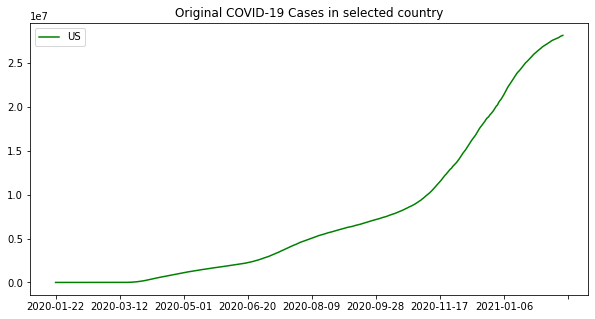

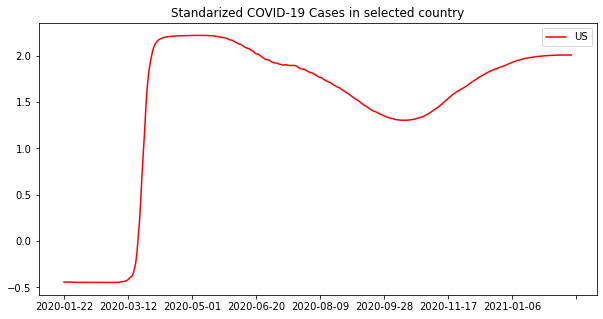

The incremental PCA reconstruction of the country US from PC=1 to PC=80 in increasing order


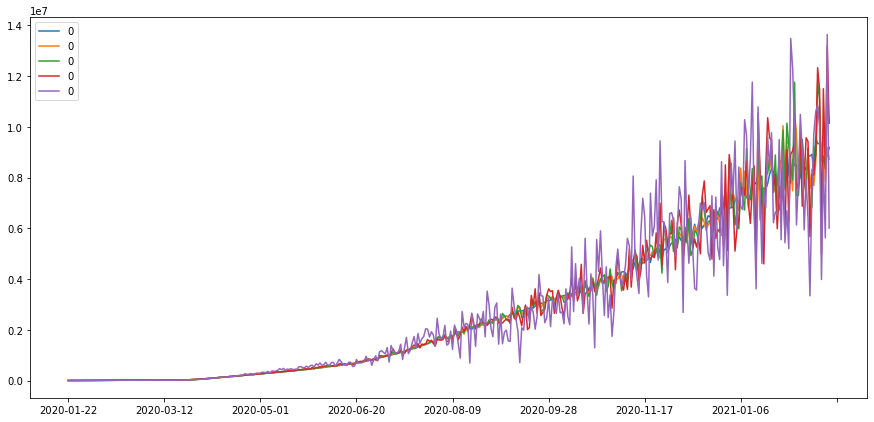

The Residual error of the incremental PCA reconstruction of the country US from PC=1 to PC=80 in increasing order


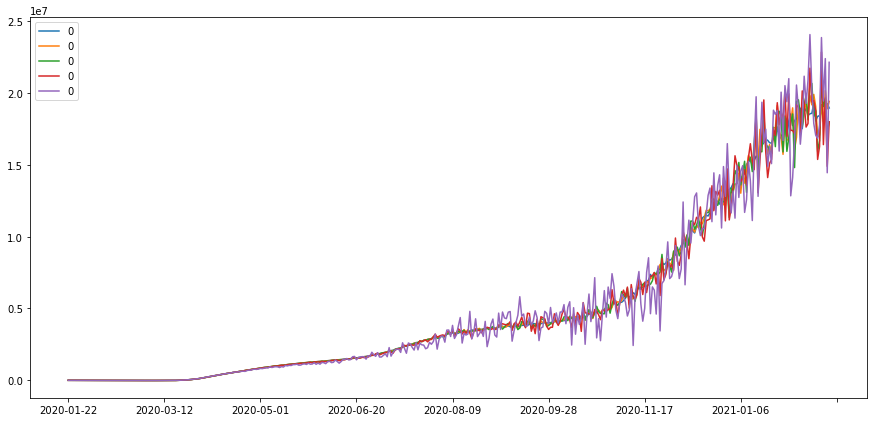

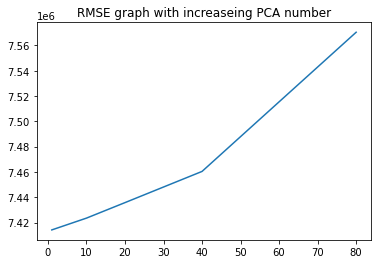

In [30]:
#Checking function for US
COVID_country(US,df,US_std,df_std,'US')

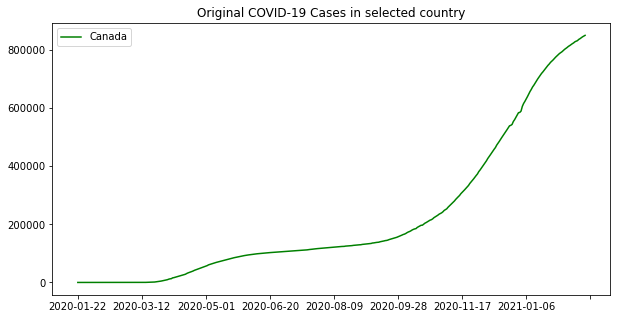

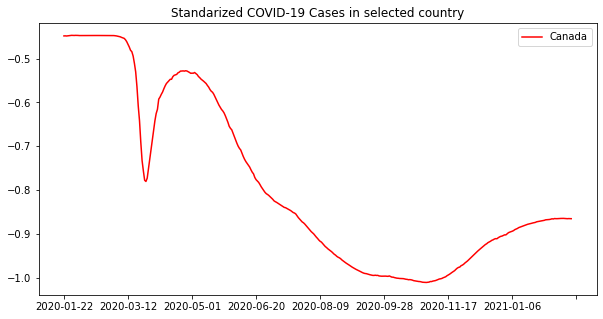

The incremental PCA reconstruction of the country Canada from PC=1 to PC=80 in increasing order


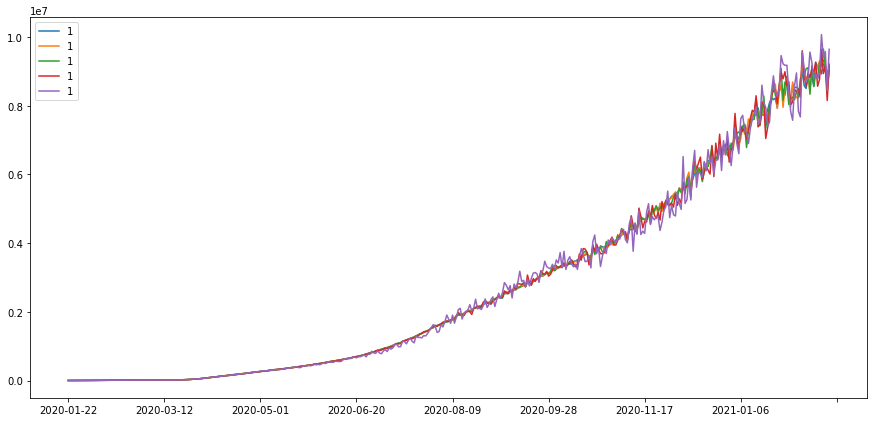

The Residual error of the incremental PCA reconstruction of the country Canada from PC=1 to PC=80 in increasing order


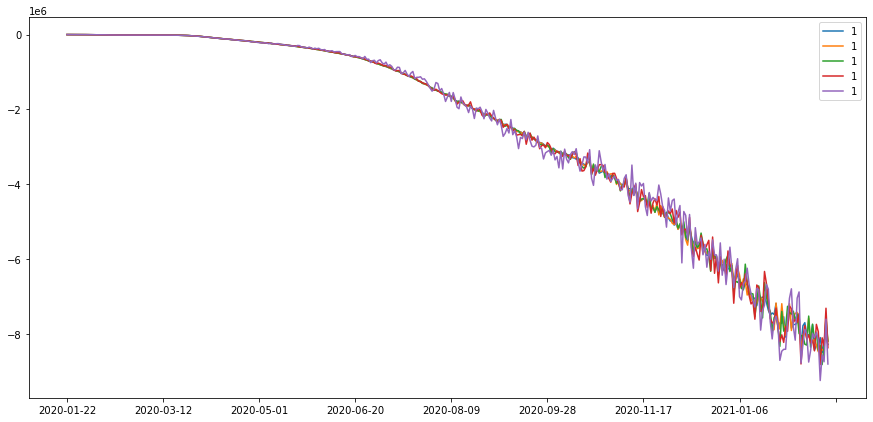

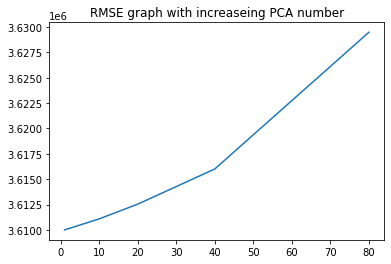

In [31]:
#Checking function for Canada
COVID_country(Canada,df,Canada_std,df_std,'Canada')

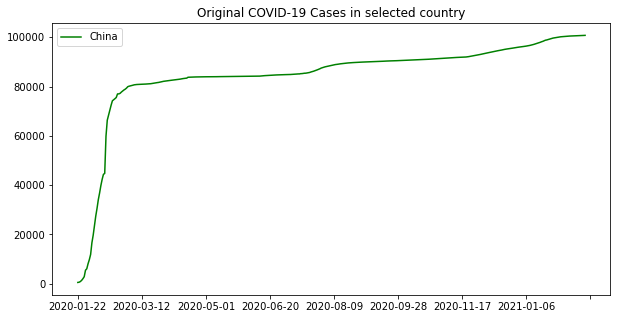

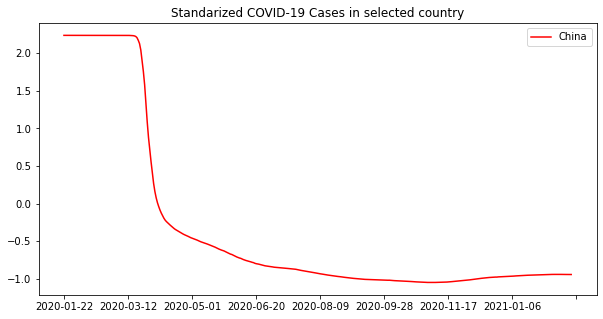

The incremental PCA reconstruction of the country China from PC=1 to PC=80 in increasing order


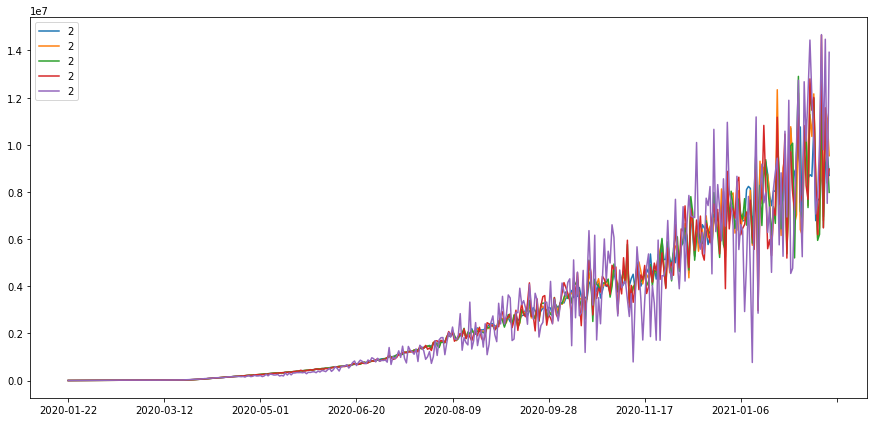

The Residual error of the incremental PCA reconstruction of the country China from PC=1 to PC=80 in increasing order


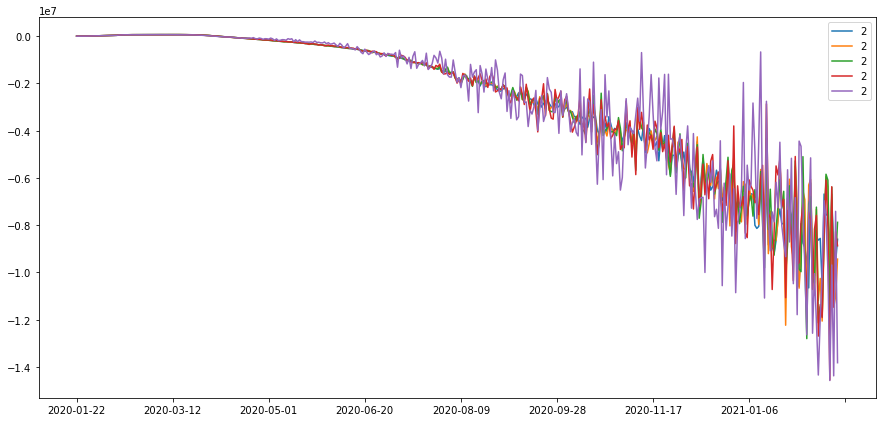

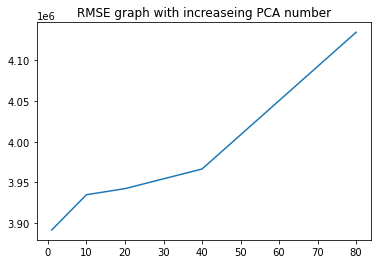

In [32]:
#Checking function for China
COVID_country(China,df,China_std,df_std,'China')

# Part 4: Time-series analysis on recovered cases [2 Marks]

Call the function that you designed in *Part 3* with this new dataset. To do that, you'll first need to preprocess the data (follow the steps we have in Parts 1 and 2 ----don't need to plot anything) and prepare the data for calling the Part 3 function **[1]**. Test your function with the new dataset, with the `US`, `Canada`, and `China`. **[1]**


In [33]:
import pandas as pd
recovered_raw = pd.read_csv(
    filepath_or_buffer='https://raw.githubusercontent.com/aps1070-2019/datasets/master/recoverd_feb_21.csv',
    index_col=0,
    thousands=','
)

In [34]:
df_rec=recovered_raw.loc[['US','Canada','China','India','Brazil','United Kingdom']]
df_rec

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21
US,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Canada,0,0,0,0,0,0,0,0,0,0,...,405861,407192,408582,409813,410902,412186,413495,414989,416394,417848
China,28,30,36,39,49,58,101,120,135,214,...,94536,94641,94728,94796,94875,94960,95034,95109,95179,95239
India,0,0,0,0,0,0,0,0,0,0,...,10600625,10611731,10621220,10633025,10644858,10656845,10667741,10678048,10689715,10699410
Brazil,0,0,0,0,0,0,0,0,0,0,...,8691664,8740445,8765048,8821887,8847264,8933402,8960755,8988618,9070505,9095692
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,10655,10850,10914,10959,11022,11099,11160,11250,11293,11311


In [35]:
X_std_rec = scaler.transform(df_rec)

df1_rec=pd.DataFrame((X_std_rec), columns=date)
df1_rec.index=['US','Canada','China','India','Brazil','United Kingdom']
df1_rec

,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,2020-01-28,2020-01-29,2020-01-30,2020-01-31,...,2021-02-12,2021-02-13,2021-02-14,2021-02-15,2021-02-16,2021-02-17,2021-02-18,2021-02-19,2021-02-20,2021-02-21
US,-0.448193,-0.448048,-0.448380,-0.447977,-0.448765,-0.448333,-0.447896,-0.447919,-0.447807,-0.448035,...,-0.953622,-0.953568,-0.953437,-0.953522,-0.953975,-0.954349,-0.954666,-0.954406,-0.954677,-0.954764
Canada,-0.448193,-0.448048,-0.448380,-0.447977,-0.448765,-0.448333,-0.447896,-0.447919,-0.447807,-0.448035,...,-0.909889,-0.909828,-0.909647,-0.909684,-0.910118,-0.910465,-0.910750,-0.910497,-0.910731,-0.910751
China,-0.311041,-0.322817,-0.343336,-0.373526,-0.385364,-0.394215,-0.398689,-0.395006,-0.403301,-0.389435,...,-0.943435,-0.943402,-0.943284,-0.943382,-0.943849,-0.944239,-0.944573,-0.944343,-0.944632,-0.944732
India,-0.448193,-0.448048,-0.448380,-0.447977,-0.448765,-0.448333,-0.447896,-0.447919,-0.447807,-0.448035,...,0.188610,0.186348,0.184893,0.183897,0.182187,0.180263,0.178326,0.175409,0.173487,0.172209
Brazil,-0.448193,-0.448048,-0.448380,-0.447977,-0.448765,-0.448333,-0.447896,-0.447919,-0.447807,-0.448035,...,-0.017083,-0.014666,-0.014043,-0.009841,-0.009676,-0.003228,-0.002969,-0.003345,0.002600,0.003289
United Kingdom,-0.448193,-0.448048,-0.448380,-0.447977,-0.448765,-0.448333,-0.447896,-0.447919,-0.447807,-0.448035,...,-0.952473,-0.952403,-0.952267,-0.952350,-0.952799,-0.953168,-0.953481,-0.953216,-0.953485,-0.953572


In [36]:
#Preprocessing the data for the inputs
US_rec=df_rec.loc[['US']]
US_rec=US_rec.iloc[:,0:300] # removing zeroes
US_std_rec=df1_rec.loc[['US']]
US_std_rec=US_std_rec.iloc[:,0:300] # removing zeroes

Canada_rec=df_rec.loc[['Canada']]
Canada_std_rec=df1_rec.loc[['Canada']]

China_rec=df_rec.loc[['China']]
China_std_rec=df1_rec.loc[['China']]

df_std_rec=df1

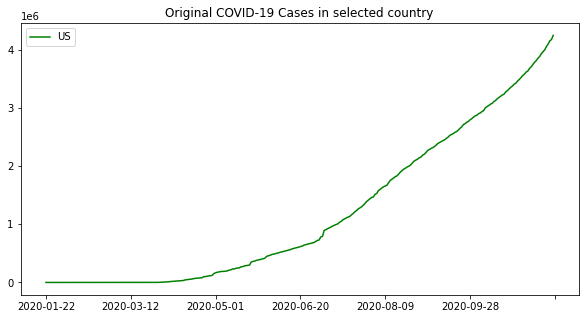

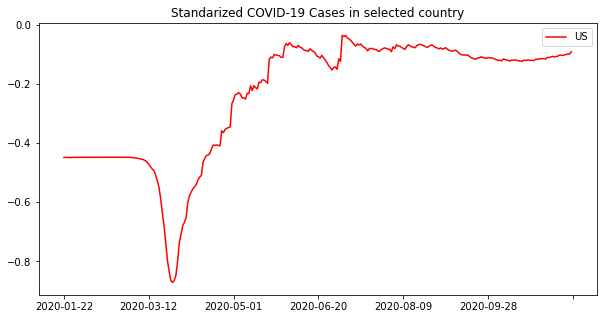

The incremental PCA reconstruction of the country US from PC=1 to PC=80 in increasing order


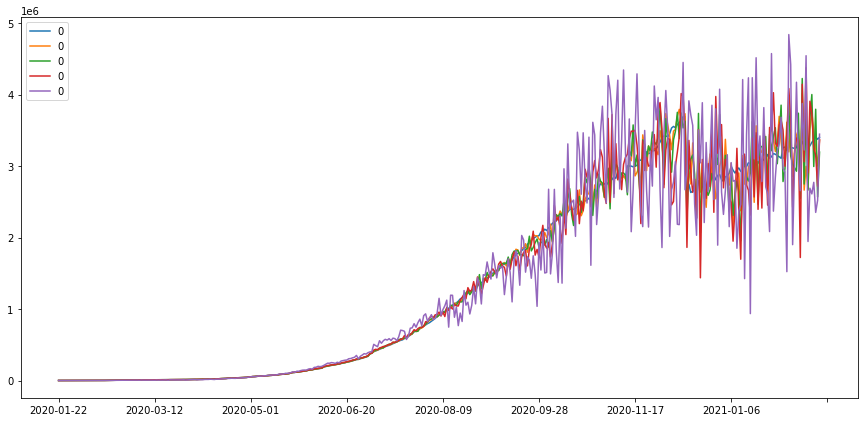

The Residual error of the incremental PCA reconstruction of the country US from PC=1 to PC=80 in increasing order


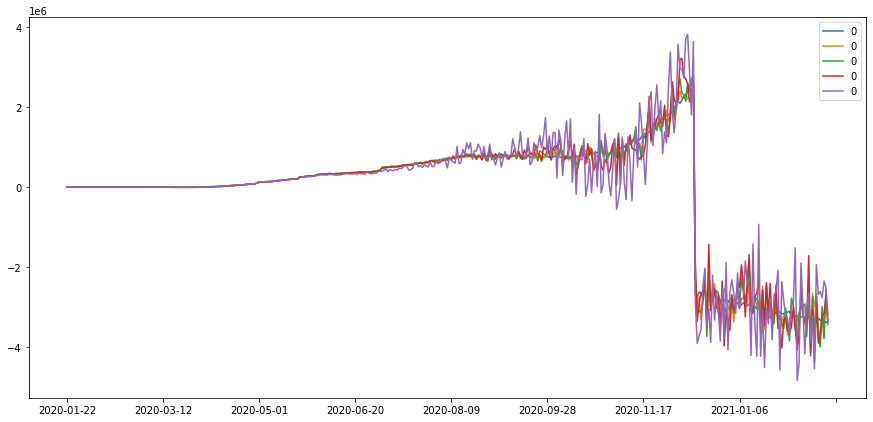

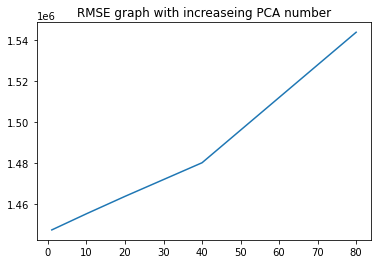

In [37]:
# Testing for US on recovered dataset
COVID_country(US_rec,df_rec,US_std_rec,df_std_rec,'US')

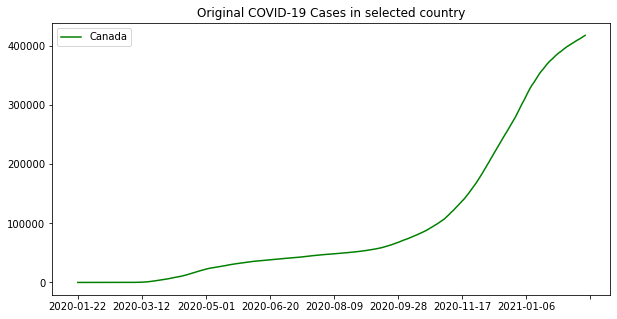

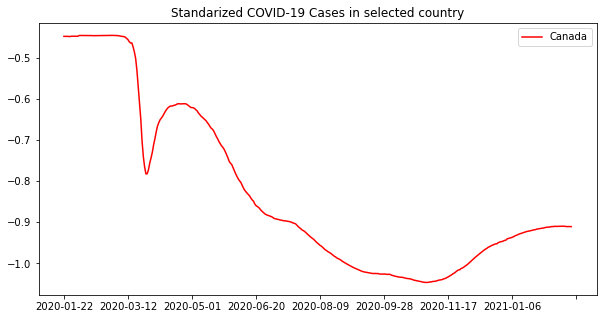

The incremental PCA reconstruction of the country Canada from PC=1 to PC=80 in increasing order


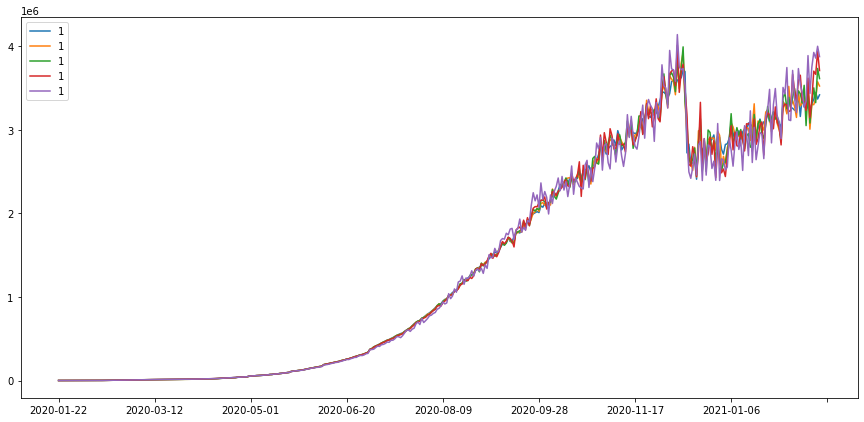

The Residual error of the incremental PCA reconstruction of the country Canada from PC=1 to PC=80 in increasing order


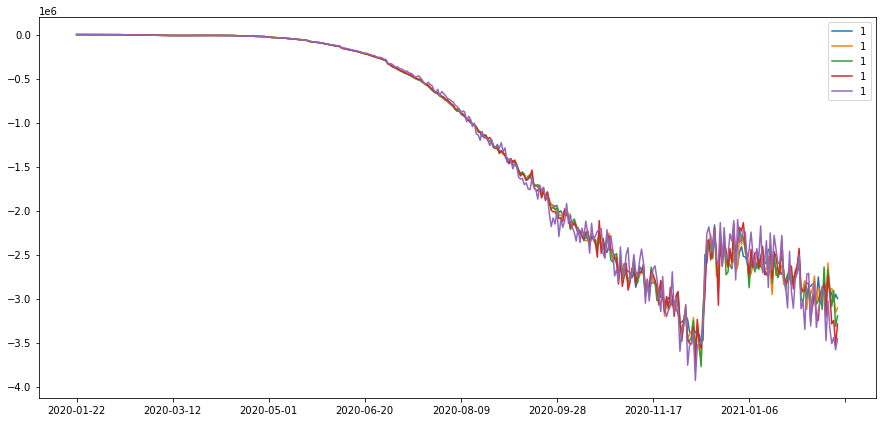

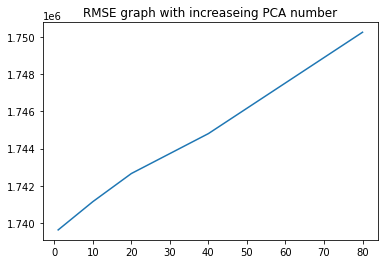

In [38]:
# Testing for Canada on recovered dataset
COVID_country(Canada_rec,df_rec,Canada_std_rec,df_std_rec,'Canada')

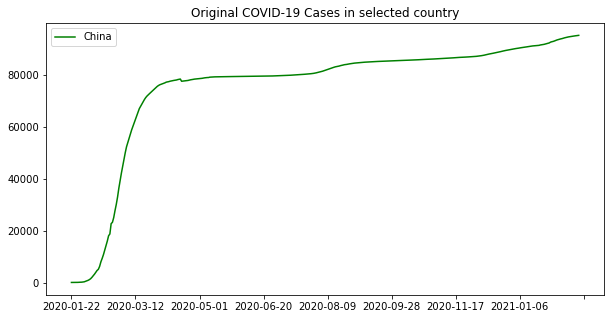

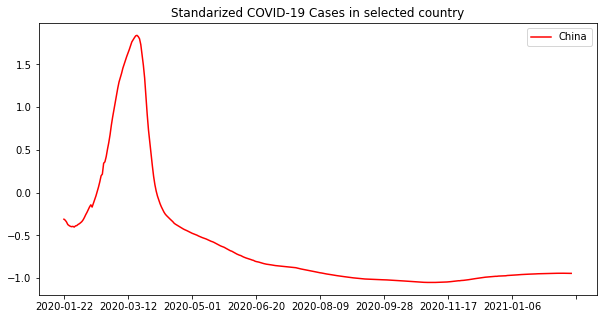

The incremental PCA reconstruction of the country China from PC=1 to PC=80 in increasing order


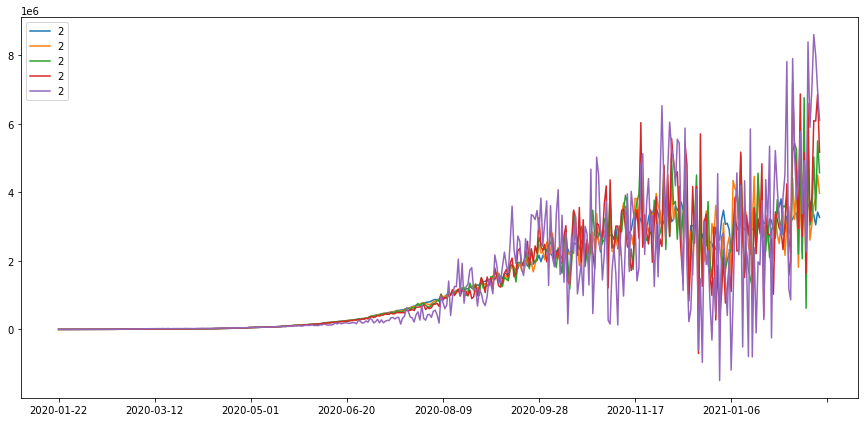

The Residual error of the incremental PCA reconstruction of the country China from PC=1 to PC=80 in increasing order


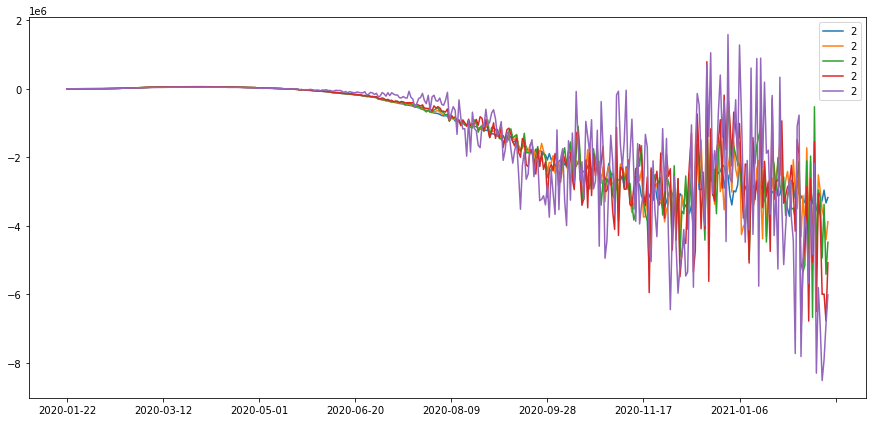

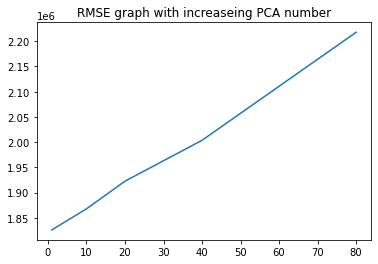

In [39]:
# Testing for China on recovered dataset
COVID_country(China_rec,df_rec,China_std_rec,df_std_rec,'China')

# Part 5: PCA on the dimension of the samples [2 Marks]

Since the number of features (dates) in our dataset is greater than the number of samples (countries), we can apply PCA on the sample dimension for faster computation. 
Repeat part 4, where you apply PCA using this technique. Compare the results and report your findings. 

In [40]:
dfT1=recovered_raw.T #Taking transpose
dfT1

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,US,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-17,48626,59684,76489,10066,18951,213,1842878,161476,22871,415221,...,44481,0,77993,1,126342,1574,158709,1431,64040,31615
2021-02-18,48798,60675,76640,10101,18972,214,1849451,161577,22874,416431,...,44976,0,78059,1,126792,1605,159369,1432,65051,31821
2021-02-19,48803,61605,76797,10146,18991,214,1855645,161790,22879,417654,...,45398,0,78100,1,127143,1627,160172,1432,66013,31972
2021-02-20,48820,62533,76940,10170,19005,217,1861433,161903,22881,419283,...,45881,0,78127,1,127598,1627,160763,1432,66943,32096


In [41]:
countryT = list(dfT1.columns)
#countryT

In [42]:
dfT = dfT1.values
dfT

array([[    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       ...,
       [48803, 61605, 76797, ...,  1432, 66013, 31972],
       [48820, 62533, 76940, ...,  1432, 66943, 32096],
       [48834, 63329, 77076, ...,  1432, 67944, 32125]])

In [43]:
X_stdT = StandardScaler().fit_transform(dfT)
X_stdT

array([[-1.20050338, -0.70124278, -1.06160507, ..., -1.20015772,
        -0.74600877, -0.71433195],
       [-1.20050338, -0.70124278, -1.06160507, ..., -1.20015772,
        -0.74600877, -0.71433195],
       [-1.20050338, -0.70124278, -1.06160507, ..., -1.20015772,
        -0.74600877, -0.71433195],
       ...,
       [ 1.56317147,  3.19386763,  1.90576076, ...,  1.11702504,
         3.75260475,  3.38853441],
       [ 1.56413417,  3.25254245,  1.91128615, ...,  1.11702504,
         3.81598182,  3.40444694],
       [ 1.56492698,  3.30287129,  1.91654107, ...,  1.11702504,
         3.88419736,  3.40816842]])

In [44]:
C_covidT = np.cov(dfT.T)
C_covidT.shape

(192, 192)

In [45]:
eigenValues_covidT, eigenVectors_covidT = np.linalg.eigh(C_covidT) 

In [46]:
W_covidT = eigenVectors_covidT[:,0:50] #With PC=50
W_covidT.shape

(192, 50)

In [47]:
projX_covidT = np.dot(X_stdT, W_covidT)
projX_covidT.shape

(397, 50)

In [48]:
ReconX_covidT = np.dot(projX_covidT, W_covidT.T)
ReconX_covidT.shape

(397, 192)

In [49]:
scaler.fit(dfT)
inversedT = scaler.inverse_transform(ReconX_covidT)

In [50]:
originalT=pd.DataFrame((inversedT))#,columns=date)
originalT.head()

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,21434.108201,11790.197302,35213.784578,453.472819,4109.454390,1.541822,527593.216167,47171.094682,13471.723803,94396.361822,...,3563.962516,1.251804e+06,32848.377438,0.000136,39801.187246,-18.185427,31771.581796,72.082724,11290.606463,5081.158077
1,21434.108196,11790.197340,35213.784578,453.472831,4109.454383,1.541822,527593.216154,47171.094680,13471.723801,94396.361798,...,3563.962508,1.251804e+06,32848.377416,0.000136,39801.187266,-18.185442,31771.581806,72.082723,11290.606459,5081.158083
2,21434.105993,11790.189293,35213.782495,453.476706,4109.455561,1.541832,527593.214641,47171.089811,13471.726034,94396.386746,...,3563.916469,1.251804e+06,32848.368989,0.000136,39801.192508,-18.185980,31771.593755,72.083399,11290.615263,5081.159480
3,21434.105985,11790.189350,35213.782496,453.476723,4109.455551,1.541832,527593.214622,47171.089809,13471.726030,94396.386710,...,3563.916458,1.251804e+06,32848.368955,0.000136,39801.192539,-18.186002,31771.593769,72.083398,11290.615256,5081.159488
4,21434.099394,11790.164987,35213.776235,453.488316,4109.459125,1.541863,527593.210137,47171.075193,13471.732743,94396.461672,...,3563.778369,1.251804e+06,32848.343735,0.000136,39801.208177,-18.187559,31771.629635,72.085432,11290.641713,5081.163647


In [51]:
originalT=pd.DataFrame((inversedT),columns=countryT)
originalT.index=[date]
originalT  # Final reconstructed dataset

,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Uruguay,US,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
2020-01-22,21434.108201,11790.197302,35213.784578,453.472819,4109.454390,1.541822,527593.216167,47171.094682,13471.723803,94396.361822,...,3563.962516,1.251804e+06,32848.377438,0.000136,39801.187246,-18.185427,31771.581796,72.082724,11290.606463,5081.158077
2020-01-23,21434.108196,11790.197340,35213.784578,453.472831,4109.454383,1.541822,527593.216154,47171.094680,13471.723801,94396.361798,...,3563.962508,1.251804e+06,32848.377416,0.000136,39801.187266,-18.185442,31771.581806,72.082723,11290.606459,5081.158083
2020-01-24,21434.105993,11790.189293,35213.782495,453.476706,4109.455561,1.541832,527593.214641,47171.089811,13471.726034,94396.386746,...,3563.916469,1.251804e+06,32848.368989,0.000136,39801.192508,-18.185980,31771.593755,72.083399,11290.615263,5081.159480
2020-01-25,21434.105985,11790.189350,35213.782496,453.476723,4109.455551,1.541832,527593.214622,47171.089809,13471.726030,94396.386710,...,3563.916458,1.251804e+06,32848.368955,0.000136,39801.192539,-18.186002,31771.593769,72.083398,11290.615256,5081.159488
2020-01-26,21434.099394,11790.164987,35213.776235,453.488316,4109.459125,1.541863,527593.210137,47171.075193,13471.732743,94396.461672,...,3563.778369,1.251804e+06,32848.343735,0.000136,39801.208177,-18.187559,31771.629635,72.085432,11290.641713,5081.163647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-17,21840.934038,8444.107879,6683.278203,6994.262924,3356.590745,210.111146,517479.633312,52629.655185,11237.347263,92364.933632,...,3413.173069,1.251795e+06,26228.770261,0.999526,47882.031618,1662.255176,43665.866493,1300.221195,10784.723423,5825.093084
2021-02-18,21901.616468,8281.631220,5913.388092,7109.119608,3337.530078,211.053989,517337.805868,52817.281006,11216.262370,92218.596224,...,3362.783195,1.251793e+06,25925.017415,0.999521,47906.194146,1693.404332,43966.043745,1299.694705,10764.882207,5795.845761
2021-02-19,21984.422625,7983.606254,5310.522676,7192.352490,3300.480138,211.013367,517187.555471,52952.944721,11193.267796,91375.113310,...,4022.172691,1.251793e+06,26033.996959,0.999522,47875.369329,1712.658466,44298.458881,1301.739611,10731.201565,5832.296862
2021-02-20,22021.010724,7882.725766,4943.424158,7259.996459,3302.835011,213.983458,517120.160718,53030.236897,11183.449474,91222.993675,...,3872.268028,1.251792e+06,25764.686620,0.999515,47903.668273,1711.739720,44463.432607,1300.827577,10740.750054,5816.890288


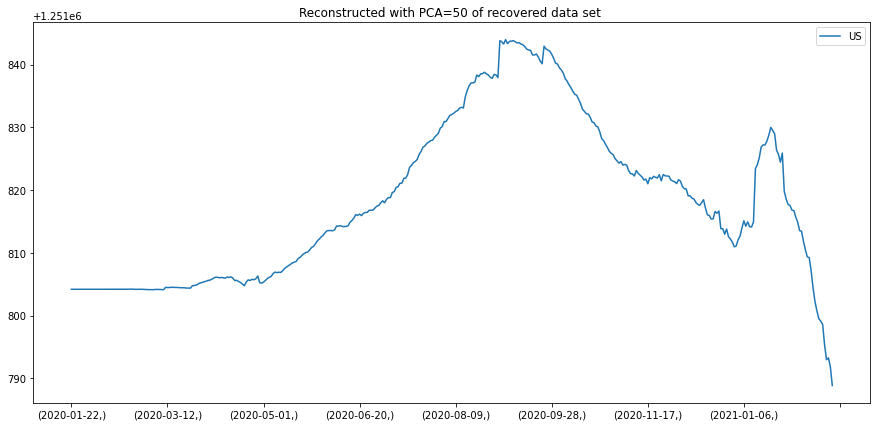

In [52]:
originalT[['US']].plot(figsize=(15,7),title="Reconstructed with PCA=50 of recovered data set ")
plt.show()

In [53]:
def less_PCA_sample(country_name):
    
    
    country_name == ['']
    
    W_covidT1 = eigenVectors_covidT[:,0:1] #With PC=1
    projX_covidT1 = np.dot(X_stdT, W_covidT1)
    ReconX_covidT1 = np.dot(projX_covidT1, W_covidT1.T)
    scaler.fit(dfT)
    inversedT1 = scaler.inverse_transform(ReconX_covidT1)
    originalT1=pd.DataFrame((inversedT1),columns=countryT)
    originalT1.index=[date]

    W_covidT2 = eigenVectors_covidT[:,0:10] #With PC=10
    projX_covidT2 = np.dot(X_stdT, W_covidT2)
    ReconX_covidT2 = np.dot(projX_covidT2, W_covidT2.T)
    scaler.fit(dfT)
    inversedT2 = scaler.inverse_transform(ReconX_covidT2)
    originalT2=pd.DataFrame((inversedT2),columns=countryT)
    originalT2.index=[date]


    W_covidT3 = eigenVectors_covidT[:,0:20] #With PC=20
    projX_covidT3 = np.dot(X_stdT, W_covidT3)
    ReconX_covidT3 = np.dot(projX_covidT3, W_covidT3.T)
    scaler.fit(dfT)
    inversedT3 = scaler.inverse_transform(ReconX_covidT3)
    originalT3=pd.DataFrame((inversedT3),columns=countryT)
    originalT3.index=[date]

    W_covidT4 = eigenVectors_covidT[:,0:40] #With PC=40
    projX_covidT4 = np.dot(X_stdT, W_covidT4)
    ReconX_covidT4 = np.dot(projX_covidT4, W_covidT4.T)
    scaler.fit(dfT)
    inversedT4 = scaler.inverse_transform(ReconX_covidT4)
    originalT4=pd.DataFrame((inversedT4),columns=countryT)
    originalT4.index=[date]

    W_covidT5 = eigenVectors_covidT[:,0:80] #With PC=80
    projX_covidT5 = np.dot(X_stdT, W_covidT5)
    ReconX_covidT5 = np.dot(projX_covidT5, W_covidT5.T)
    scaler.fit(dfT)
    inversedT5 = scaler.inverse_transform(ReconX_covidT5)
    originalT5=pd.DataFrame((inversedT5),columns=countryT)
    originalT5.index=[date]


    ax = plt.gca()
    originalT1[[country_name]].plot(figsize=(15,7),ax=ax,title=('Incremental PCA reconstruction plot of Canada'))
    originalT2[[country_name]].plot(figsize=(15,7),ax=ax)
    originalT3[[country_name]].plot(figsize=(15,7),ax=ax)
    originalT4[[country_name]].plot(figsize=(15,7),ax=ax)
    originalT5[[country_name]].plot(figsize=(15,7),ax=ax)


    ax1 = ax.twinx()
    dfT1[[country_name]].plot(figsize=(15,7),ax=ax1)
    plt.show()



    # Residual plots
    residual_errorT1=dfT-inversedT1
    originalT11=pd.DataFrame((residual_errorT1),columns=countryT)
    originalT11.index=[date]

    residual_errorT2=dfT-inversedT2
    originalT12=pd.DataFrame((residual_errorT2),columns=countryT)
    originalT12.index=[date]

    residual_errorT3=dfT-inversedT3
    originalT13=pd.DataFrame((residual_errorT3),columns=countryT)
    originalT13.index=[date]   

    residual_errorT4=dfT-inversedT4
    originalT14=pd.DataFrame((residual_errorT4),columns=countryT)
    originalT14.index=[date] 

    residual_errorT5=dfT-inversedT5
    originalT15=pd.DataFrame((residual_errorT5),columns=countryT)
    originalT15.index=[date]

    ax12 = plt.gca()
    originalT11[[country_name]].plot(figsize=(15,7),ax=ax12,title='Residual Error Plot with increasing PCA')
    originalT12[[country_name]].plot(ax=ax12)
    originalT13[[country_name]].plot(ax=ax12)
    originalT14[[country_name]].plot(ax=ax12)
    originalT15[[country_name]].plot(ax=ax12)
    plt.show()
    
    
    
    #RMSE plotting
    TT=dfT1[[country_name]].values
    
    TT1=originalT1[[country_name]].values
    diffT1= TT-TT1
    differences_squaredT1 = diffT1 ** 2                    #the SQUAREs of ^
    mean_of_differences_squaredT1 = differences_squaredT1.mean()  #the MEAN of ^
    rmse_valT1 = np.sqrt(mean_of_differences_squaredT1)

    TT2=originalT2[[country_name]].values
    diffT2= TT-TT2
    differences_squaredT2 = diffT2 ** 2                    #the SQUAREs of ^
    mean_of_differences_squaredT2 = differences_squaredT2.mean()  #the MEAN of ^
    rmse_valT2 = np.sqrt(mean_of_differences_squaredT2)
 

    TT3=originalT3[[country_name]].values
    diffT3= TT-TT3
    differences_squaredT3 = diffT3 ** 2                    #the SQUAREs of ^
    mean_of_differences_squaredT3 = differences_squaredT3.mean()  #the MEAN of ^
    rmse_valT3 = np.sqrt(mean_of_differences_squaredT3)


    TT4=originalT4[[country_name]].values
    diffT4= TT-TT4
    differences_squaredT4 = diffT4 ** 2                    #the SQUAREs of ^
    mean_of_differences_squaredT4 = differences_squaredT4.mean()  #the MEAN of ^
    rmse_valT4 = np.sqrt(mean_of_differences_squaredT4)


    TT5=originalT5[[country_name]].values
    diffT5= TT-TT5
    differences_squaredT5 = diffT5 ** 2                    #the SQUAREs of ^
    mean_of_differences_squaredT5 = differences_squaredT5.mean()  #the MEAN of ^
    rmse_valT5 = np.sqrt(mean_of_differences_squaredT5)

    y = [rmse_valT1,rmse_valT2,rmse_valT3,rmse_valT4,rmse_valT5] 
    x = [1,10,20,40,80] 
    plt.plot(x, y) 
    plt.title("RMSE graph with increasing PCA number")
    plt.show() 
    

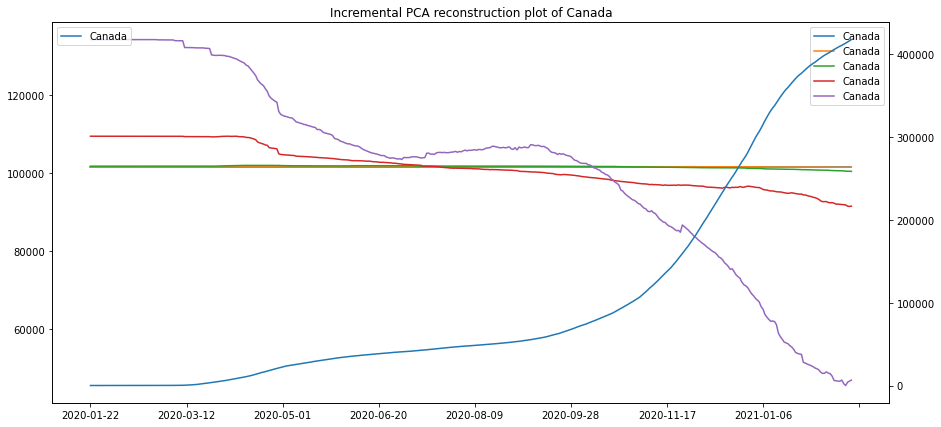

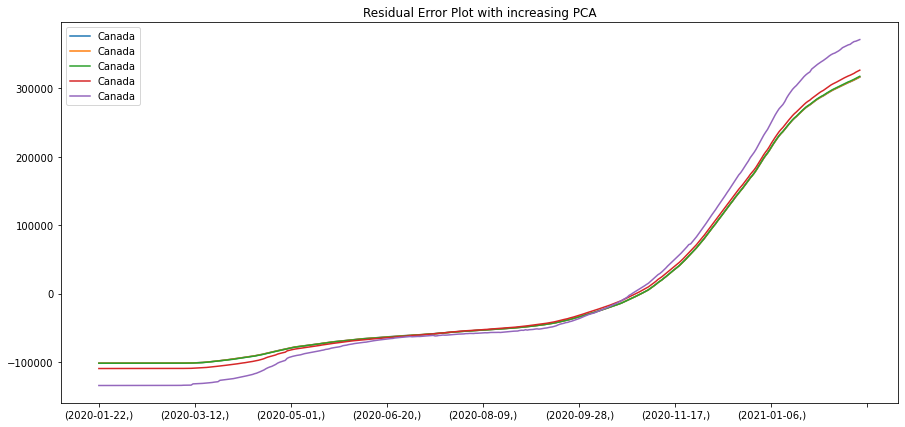

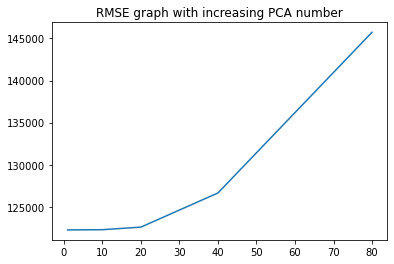

In [54]:
less_PCA_sample('Canada')

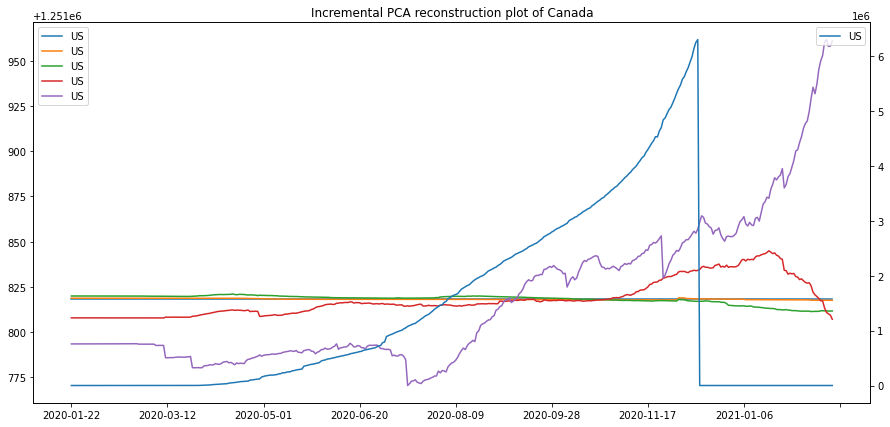

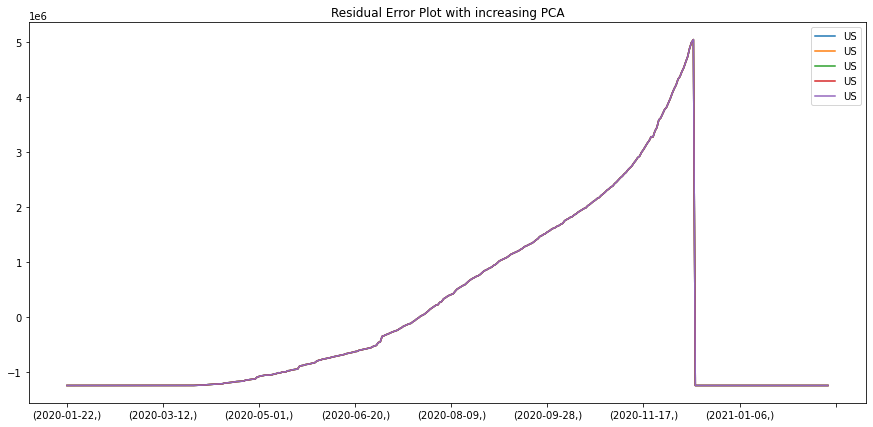

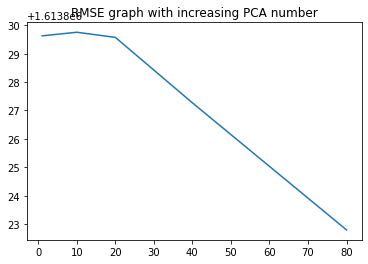

In [55]:
less_PCA_sample('US')

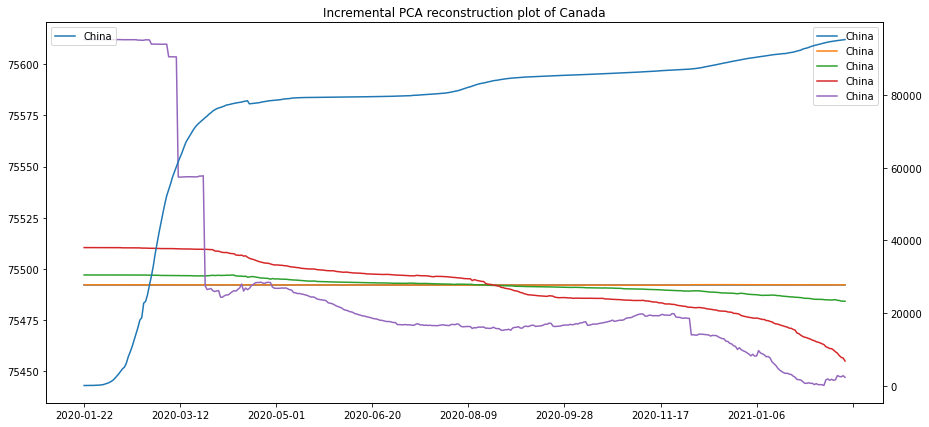

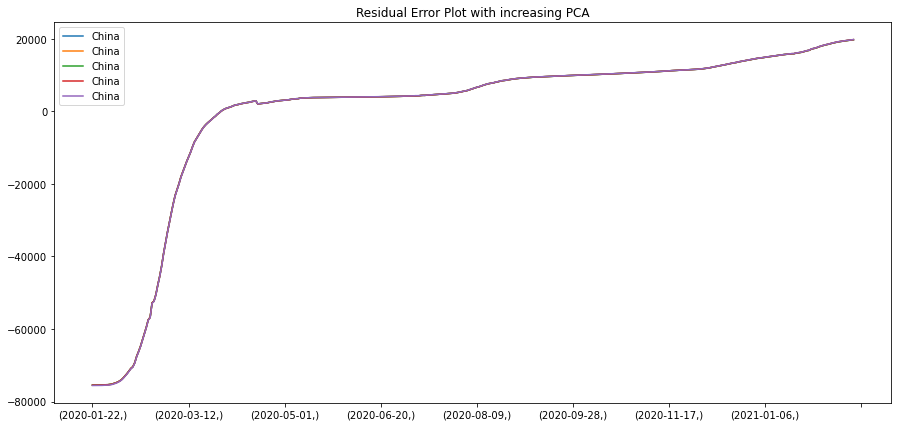

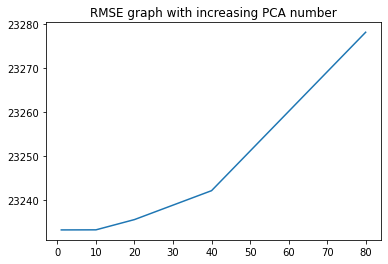

In [56]:
less_PCA_sample('China')

#### The PCA reconstruction plot looks smooth with lower PCA components. RMSE value is much smaller than the other previous ones. Residual value is also very less as comparison to the part 4. 
#### The sample (country) taken as PCA components is beneficial with respect to the visualization, less error values as well as more compression factor.

# Part 6: MNIST dataset [3 Marks]
MNIST is a dataset for hand-written digit recognition. 
Each image in MNIST has 28x28 pixels which can be represented in an array with 784 elements. In this part, we are going to use PCA to compress these images. The $x$ matrix below has 1000 images.
* Compute the covariance of the dataframe and perform eigendecomposition.  **[0.5]**
* Plot the first 10 eigenvectors (as images similar to eigenfaces). What trends do you observe? **[0.5]**
* Create a function that requires an argument $n$ and plots a random image from the dataset, as well as a reconstruction with the first $n$ th principal components. **[0.5]**
* Run your function a few times, and determine how many components are required so that we (humans!) can identify the digits. **[0.5]**
* Assume you want to share this dataset with someone else. Instead of directly giving him the whole dataset, you can share the eigenvectors (some of them) and projections with him, and he can do a dot product to get the reconstructions.  Based on the number of components that you found in the last step, what would be the compression ratio for a dataset with 1000 images? **[1]**
  * Hint: compare the dataset size with a case where we only use principal components and projections and also don't forget to add the mean face (vector).

In [57]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
x = mnist.data[0:1000]
y = mnist.target[0:1000]

In [58]:
x.shape

(1000, 784)

In [59]:
import matplotlib.pyplot as plt 
import matplotlib.pyplot as imshow
plt.gray() 
plt.imshow(x[2].reshape(28,28)) 
print ("Label is:", y[2])
plt.show() 

KeyError: 2

<Figure size 432x288 with 0 Axes>

In [ ]:
# Standarizing the data
X_std_mn = StandardScaler().fit_transform(x)

In [ ]:
# Compute covariance matrix
C_mn = np.cov(X_std_mn.T)
C_mn

In [ ]:
# Eigen decomposition
eigenValues_mn, eigenVectors_mn = np.linalg.eigh(C_mn) 
print ("Eig Vec:\n ",eigenVectors_mn, " \n Eig Val: \n", eigenValues_mn)

In [ ]:
eigenValues_mn.shape, eigenVectors_mn.shape

In [ ]:
# plot the first eigen vector/Face
plt.imshow(eigenVectors_mn[:, 0].reshape(28, 28), cmap = plt.cm.gray) 

In [ ]:
import math
# print first 10 eigen vectors/faces
COUNT = 10
ROWS = math.ceil(COUNT/5)
fig = plt.figure(figsize=(15, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 5, i+1)
    plt.imshow(eigenVectors_mn[:, i].reshape(28, 28), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

The pixelates seems to be increasing a little bit as compared to figure 1 with figure 10. Looks more clearer as number increases.

In [ ]:
def getBasisCountThatPreservesVariance(eigenValues, variance=0.99):
    for idx, cumulativeSum in enumerate(np.cumsum(eigenValues) / np.sum(eigenValues)):
        if cumulativeSum > variance:
            return idx

def pca(X, y):
    n, d = X.shape
    mu = X.mean(axis=0)
    X = X - mu # standardising data
    
    if n > d:
        C = np.dot(X.T,x) / (n-1) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
    else:
        C = np.dot(X,X.T) / (n-1) # covariance matrix
        eigenValues, eigenVectors = np.linalg.eigh(C)
        eigenVectors = np.dot(X.T, eigenVectors)
        for i in range(n):
            eigenVectors[:,i] = eigenVectors[:, i] / np.linalg.norm(eigenVectors[:, i])
            

    print ("Dim of Full Eigen Vectors", eigenVectors.shape)
            
    # sort eigenVectors in descending order by their eigenValue
    idx = np.argsort(-eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:, idx]
    
    # select based on numOfBasis
    numOfBasis = getBasisCountThatPreservesVariance(eigenValues)
    print('Number of useful eigenBasis are: ', numOfBasis)
    eigenValues = eigenValues[0:numOfBasis].copy()
    eigenVectors = eigenVectors[:, 0:numOfBasis].copy()
    return eigenValues, eigenVectors, mu

In [ ]:
eigenValues_mn, eigenVectors_mn, mean = pca(x, y)

In [ ]:
IMAGE_IDX = 20 # image idx in dataset
# actual image
plt.imshow(x[IMAGE_IDX].reshape(28,28), cmap=plt.cm.gray)
plt.show()

In [ ]:
def project (W , X , mu):
    return np.dot (X - mu , W)
def reconstruct (W , Y , mu) :
    return np.dot (Y , W.T) + mu

In [ ]:
# create reconstructed images
COUNT = 6 # count of first eigenVectors used to reconstruct the image
reconImages = []
for numEvs in range (1, COUNT+1):
    P = project(eigenVectors_mn[:, 0:numEvs], x[IMAGE_IDX].reshape(1, -1), mean)
    R = reconstruct(eigenVectors_mn[:, 0:numEvs], P, mean)
    reconImages.append(R.reshape(x[0].shape))

In [ ]:
# plot reconstructed images
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i].reshape(28,28), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

In [ ]:
# create reconstructed images
numEvsSet = [1, 10 , 100, 200,274] # these no. of eigenVectors will be used to reconstruct the image.
COUNT = len(numEvsSet)
reconImages = []
for numEvs in numEvsSet:
    P = project(eigenVectors_mn[:, 0:numEvs], x[IMAGE_IDX].reshape(1,-1), mean)
    R = reconstruct(eigenVectors_mn[:, 0:numEvs], P, mean)
    reconImages.append(R.reshape(x[0].shape))

In [ ]:
# plot reconstructed images
ROWS = math.ceil(COUNT/3)
fig = plt.figure(figsize=(12, ROWS * 4))
for i in range(0, COUNT):
    plt.subplot(ROWS, 3, i+1)
    plt.imshow(reconImages[i].reshape(28,28), cmap = plt.cm.gray)
    plt.title("Reconstruction:"+ str(numEvsSet[i]) + " Components" )

In [ ]:
# Creating random image 
import random
ran= random.randint(0,1000)
plt.imshow(x[ran].reshape(28,28), cmap=plt.cm.gray)
plt.show()

In [ ]:
# Function with the argument n and plots a random image from the dataset, as well as a reconstruction with the first nth principal components.
def randomplotting(n,eigenVectors,X):
  ran= random.randint(0,1000) # Ramdonly selecting numbers from the dataset
  plt.imshow(X[ran].reshape(28,28), cmap=plt.cm.gray)
  print("Random selected Number:", y[ran])
  plt.show()

  COUNT = n # count of first eigenVectors used to reconstruct the image
  reconImages = []
  for numEvs in range (1, COUNT+1):
    P = project(eigenVectors[:, 0:numEvs], X[ran].reshape(1, -1), mean)
    R = reconstruct(eigenVectors[:, 0:numEvs], P, mean)
    reconImages.append(R.reshape(X[0].shape))

  # plot reconstructed images
  ROWS = math.ceil(COUNT/10)
  fig = plt.figure(figsize=(40, ROWS * 4))
  for i in range(0, COUNT):
    plt.subplot(ROWS, 10, i+1)
    plt.imshow(reconImages[i].reshape(28,28), cmap = plt.cm.gray)
    plt.title('#{}'.format(i+1))

In [ ]:
# Random plotting 
randomplotting(4,eigenVectors_mn,x)

In [ ]:
# Random plotting 
randomplotting(20,eigenVectors_mn,x)

In [ ]:
# Random plotting 
randomplotting(40,eigenVectors_mn,x)

In [ ]:
# Random plotting 
randomplotting(80,eigenVectors_mn,x)

In [ ]:
# Random plotting 
randomplotting(200,eigenVectors_mn,x)

In [ ]:
# Random plotting 
randomplotting(300,eigenVectors_mn,x)

Looking at differernt values, i came to conclusion that n=40 will be ideal for number recognizition.

In [ ]:
# Size of the total elements in the dataframe
total_element=1000*728 # shape of the x array
total_element

In [ ]:
W_mn = eigenVectors_mn[:, 0:80]
W_mn

In [ ]:
projX_mn = np.dot(X_std_mn, W_mn)
X_std_mn.shape, W_mn.shape , projX_mn.shape

In [ ]:
X_std_mn.mean(axis=0).shape

In [ ]:
#Thus following the compression formula as We determine only 10 PCs are enough: W_op: (5000, 10)
#We apply projection: X @ W_op = Proj (1000, 10)
#Now data is summarized in Proj:(1000,10) and W_op: (5000, 10) Total elements: 60,000!!!
#Compression Ratio: 5,000,000 / (60,000 + StandardScaler parameters) ~ 80x

Compression_ratio= total_element/((784*40)+(1000*40)+(784))
Compression_ratio

# References

Understanding PCA and SVD:
1. https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8
2. https://stats.stackexchange.com/questions/134282/relationship-between-svd-and-pca-how-to-use-svd-to-perform-pca
3. https://stats.stackexchange.com/questions/2691/making-sense-of-principal-component-analysis-eigenvectors-eigenvalues
4. https://hadrienj.github.io/posts/Deep-Learning-Book-Series-2.8-Singular-Value-Decomposition/

PCA:
1. Snippets from: https://plot.ly/ipython-notebooks/principal-component-analysis/
2. https://www.value-at-risk.net/principal-component-analysis/

Covid Data:
1. https://www.worldometers.info/coronavirus/
2. https://datahub.io/core/covid-19#resource-time-series-19-covid-combined


